## The goal of this part is to get a general idea of the data we are looking at by generating plots:
1. histogram of log-fold-change (human) per cell type we are interested in
2. pie chart showing the percentage of ASE, nonASE and else genes per cell type we are interested in.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os

In [2]:
ASE_DATA_PATH = "ASE_info.tsv"
data = pd.read_csv(ASE_DATA_PATH, sep="\t")
print(data.head())

    Gene  index Chromosome  Start(hg38)   End(hg38)  Start(hg19)   End(hg19)  \
0   A1BG      0      chr19   58346806.0  58353499.0   58858172.0  58864865.0   
1    A2M      1      chr12    9067708.0   9116229.0    9220304.0   9268825.0   
2  A2MP1      2      chr12    9228533.0   9234207.0    9381129.0   9386803.0   
3   NAT1      3       chr8   18170419.0  18223689.0   18027928.0  18081198.0   
4   NAT2      4       chr8   18386585.0  18401219.0   18244095.0  18258729.0   

  Strand  ID(ENTREZ)               Gene type  ...  \
0      -         1.0          protein_coding  ...   
1      -         2.0          protein_coding  ...   
2      -         3.0  transcribed_pseudogene  ...   
3      +         9.0          protein_coding  ...   
4      +        10.0          protein_coding  ...   

   Pancreatic_progenitor_(PP)_gene_ase_type iPSCs_gene_ase_type  \
0                                    nonASE                 ASE   
1                                       ASE                 ASE   

In [3]:
celltypes = ["Cardiomyocyte_(CM)", "Endothelial_not_treated", "Keratinocytes", "9_Chondrocytes", "Skeletal_myocyte_(SKM)", "Motor_neuron_(MN)", "Cortical_organoids_d50", "Hepatocyte_Progenitor_(HP)",
             "iPSCs", "CNCCs", "Pancreatic_progenitor_(PP)", "10_Neural_Progenitors_+_BAD", "Pooled_fibroblasts", "Pooled_epidermis",
            "4_Prechondral_Mesenchyme", "8_Also_Prechondral_Mesenchyme", "HF_Sebocytes", "Cortical_organoids_d100", "Cortical_organoids_d150"]
# there was no column relating to cartilage organoids.I am only keeping "pooled fibroblasts" since it is an aggregation of all individual fibroblast columns.

# collect column names for each purpose
LFC_human_columns = []
ASE_type_columns = []
for cell in celltypes:
    lfs_col = cell + "_LFC_human_ref"
    ase_col = cell + "_gene_ase_type"
    LFC_human_columns.append(lfs_col)
    ASE_type_columns.append(ase_col)


In [4]:
data.head()

,Gene,index,Chromosome,Start(hg38),End(hg38),Start(hg19),End(hg19),Strand,ID(ENTREZ),Gene type,...,Pancreatic_progenitor_(PP)_gene_ase_type,iPSCs_gene_ase_type,CNCCs_gene_ase_type,Cortical_organoids_d50_gene_ase_type,Cortical_organoids_d100_gene_ase_type,Cortical_organoids_d150_gene_ase_type,Endothelial_not_treated_gene_ase_type,Endothelial_TNF_gene_ase_type,Endothelial_Spin_gene_ase_type,ASE_count
0,A1BG,0,chr19,58346806.0,58353499.0,58858172.0,58864865.0,-,1.0,protein_coding,...,nonASE,ASE,nonASE,ASE,ASE,ASE,ASE,ASE,ASE,10
1,A2M,1,chr12,9067708.0,9116229.0,9220304.0,9268825.0,-,2.0,protein_coding,...,ASE,ASE,ASE,nonASE,nonASE,nonASE,ASE,ASE,ASE,10
2,A2MP1,2,chr12,9228533.0,9234207.0,9381129.0,9386803.0,-,3.0,transcribed_pseudogene,...,else,else,else,else,else,else,else,else,else,0
3,NAT1,3,chr8,18170419.0,18223689.0,18027928.0,18081198.0,+,9.0,protein_coding,...,ASE,ASE,nonASE,nonASE,nonASE,nonASE,nonASE,nonASE,ASE,6
4,NAT2,4,chr8,18386585.0,18401219.0,18244095.0,18258729.0,+,10.0,protein_coding,...,nonASE,nonASE,else,nonASE,nonASE,else,nonASE,nonASE,nonASE,0


### LFC Histograms

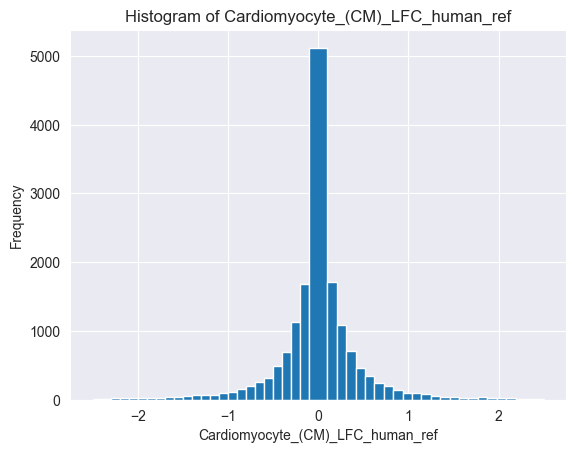

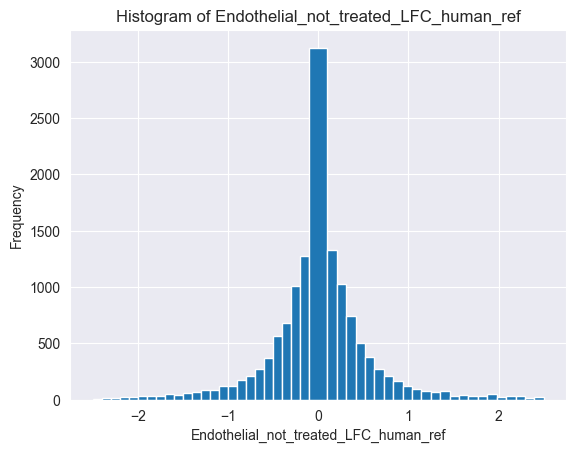

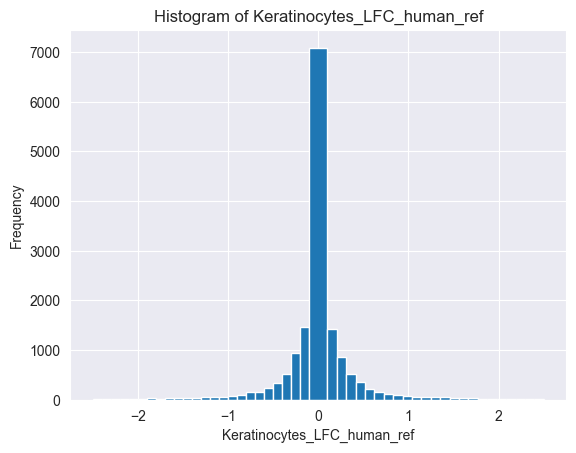

In [5]:
target_dir = 'LFC_histograms'

# Create dir if it doesnt exist
os.makedirs(target_dir, exist_ok=True)

edges_left = np.linspace(-2.5, -0.1, 24, endpoint=False)
edges_right = np.linspace(0.1, 2.5, 24)

bins = np.concatenate((edges_left, [-0.1, 0.1], edges_right))

for idx, col in enumerate(LFC_human_columns):
    fig, ax = plt.subplots()  # Create a figure and an axes object
    data[col].hist(bins=bins, ax=ax)  # Pass the axes object to hist()

    ax.set_title(f"Histogram of {col}")  # Set the title
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True)

    plt.savefig(f"{target_dir}/{col}_histogram.png") # Save the figure

    # Show only the first 3 plots
    if idx < 3:
        plt.show()
    else:
        plt.close()

### Pie Chart of ASE/nonASE/else Genes

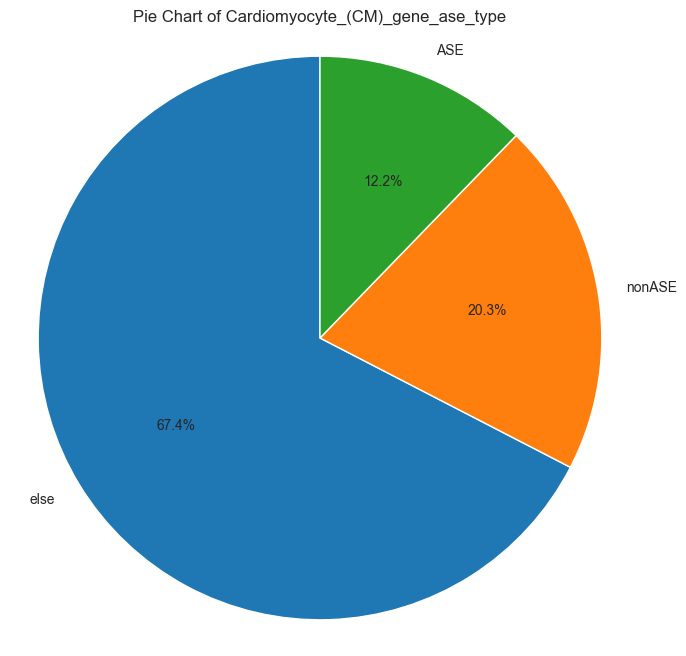

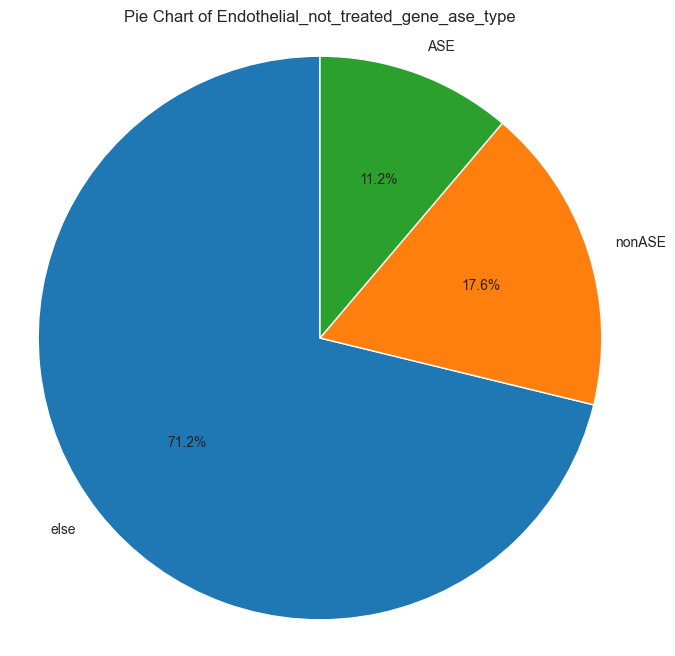

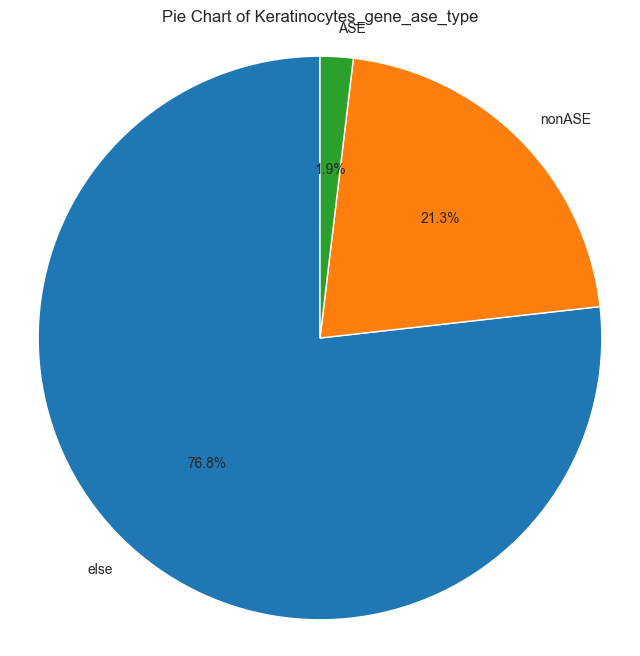

In [6]:
target_dir = 'ase_genes_pie_charts'
os.makedirs(target_dir, exist_ok=True)
for idx, col in enumerate(ASE_type_columns):
    value_counts = data[col].value_counts()
    # Create the pie chart
    plt.figure(figsize=(8, 8))  # Create a new figure for each column, adjust size as needed
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart of {col}")  # Set the title
    plt.axis('equal')  # Ensure the pie chart is circular
    plt.savefig(f"{target_dir}/{col}.png")  # Save the figure
    if idx < 3:
        plt.show()
    else:
        plt.close()

## Goal of this next part: for each disease, create plots to describe distribution of gene ase type in the associated genes in comparison to the entire genome. In addition, run Fisher exact test to see if the distributions differ significantly between the associated genes and the entire genome, and do this per cell type (in all cell types relevant for each of the diseases).

In [7]:
# define functions
from scipy.stats import fisher_exact
import seaborn as sns

def contingency_table(df, celltype, gene_list):
    ase_colname = celltype + "_gene_ase_type"
    gene_col_name = df.columns[0]  # Assuming gene names are in the first column

    # Convert gene list and DataFrame gene names to lowercase
    lowercase_gene_list = [gene.lower() for gene in gene_list]
    df[gene_col_name] = df[gene_col_name].str.lower()

    genes_in_list_df = df[df[gene_col_name].isin(lowercase_gene_list)][ase_colname].value_counts()
    genes_not_in_list_df = df[~df[gene_col_name].isin(lowercase_gene_list)][ase_colname].value_counts()

    # Ensure all categories are present for both groups
    all_categories = ["ASE", "nonASE", "else"]
    genes_in_list_counts = genes_in_list_df.reindex(all_categories, fill_value=0)
    genes_not_in_list_counts = genes_not_in_list_df.reindex(all_categories, fill_value=0)

    contingency_table = pd.DataFrame({
        "In Gene List": genes_in_list_counts,
        "Not in Gene List": genes_not_in_list_counts
    })

    return contingency_table

def run_fisher_exact_test(contingency_table):
    """
    Performs Fisher's exact test on a contingency table (2x3).

    Args:
        contingency_table (pd.DataFrame): A DataFrame with ASE categories as rows
                                          and 'In Gene List', 'Not in Gene List' as columns.

    Returns:
        tuple: A tuple containing the odds ratio and the p-value from the test.
               Returns None if the contingency table is not in the expected format.
    """
    if contingency_table.shape != (3, 2) or list(contingency_table.index) != ["ASE", "nonASE", "else"] or list(contingency_table.columns) != ["In Gene List", "Not in Gene List"]:
        print("Warning: Contingency table is not in the expected 3x2 format with correct row and column names.")
        return None

    # We need to perform Fisher's exact test for each ASE category against the others
    results = {}
    categories = contingency_table.index

    for i in range(len(categories)):
        category = categories[i]
        other_categories_count_in = contingency_table.loc[categories.difference([category]), "In Gene List"].sum()
        other_categories_count_out = contingency_table.loc[categories.difference([category]), "Not in Gene List"].sum()

        table = [
            [contingency_table.loc[category, "In Gene List"], contingency_table.loc[category, "Not in Gene List"]],
            [other_categories_count_in, other_categories_count_out]
        ]
        oddsratio, pvalue = fisher_exact(table, alternative='two-sided')
        results[f"({category} vs Others)"] = {"oddsratio": oddsratio, "pvalue": pvalue}

    return results

def plot_ase_distribution_frequencies(contingency_table, title="ASE Frequency Distribution"):
    """
    Generates a bar plot showing the frequency distribution of ASE types
    for genes in and not in the gene list, stacked by gene list within each ASE category.
    Prints total number of genes above each bar.

    Args:
        contingency_table (pd.DataFrame): A DataFrame with ASE categories as rows
                                          and 'In Gene List', 'Not in Gene List' as columns.
        title (str, optional): The title of the plot. Defaults to "ASE Frequency Distribution".
    """
    if contingency_table.shape != (3, 2) or list(contingency_table.index) != ["ASE", "nonASE", "else"] or list(contingency_table.columns) != ["In Gene List", "Not in Gene List"]:
        print("Warning: Contingency table is not in the expected 3x2 format with correct row and column names for plotting frequencies.")
        return

    # Calculate the total number of genes in each group
    total_in_list = contingency_table["In Gene List"].sum()
    total_not_in_list = contingency_table["Not in Gene List"].sum()

    # Calculate the frequencies
    freq_table = pd.DataFrame({
        "Disease Associated Genes": contingency_table["In Gene List"] / total_in_list if total_in_list > 0 else 0,
        "Other Genes": contingency_table["Not in Gene List"] / total_not_in_list if total_not_in_list > 0 else 0
    })

    # Transpose the table for the desired stacking
    freq_table_transposed = freq_table.T

    # Plotting
    ax = freq_table_transposed.plot(kind='bar', stacked=True, figsize=(8, 6)) # Assign plot to an axes object
    plt.title(title)
    plt.ylabel("Frequency (Proportion)")
    plt.xlabel("Gene Group")
    plt.xticks(rotation=0)
    plt.legend(title="ASE Type", bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
    plt.tight_layout()

    # Add total counts above each bar
    totals = [total_in_list, total_not_in_list]
    for i, total in enumerate(totals):
        ax.text(i, 1.02, f'n={total}', ha='center', va='bottom', fontsize=10, color='black') # 1.02 is slightly above the top of the bar

    target_dir = 'barplots_with_else'
    os.makedirs(target_dir, exist_ok=True)

    plt.savefig(f"{target_dir}/{title}.png")
    plt.close()



In [8]:
# load gene lists:
gene_lists_df = pd.read_csv("joint_gene_list_per_trait.csv")
gene_lists_df['All_Genes'] = gene_lists_df['All_Genes'].apply(lambda x: ast.literal_eval(x))
gene_lists_df['Mapped_GWAS_Genes'] = gene_lists_df['Mapped_GWAS_Genes'].apply(lambda x: ast.literal_eval(x))
gene_lists_df['Mapped_GWAS_MeanCounts'] = gene_lists_df['Mapped_GWAS_MeanCounts'].apply(lambda x: ast.literal_eval(x))
gene_lists_df['Mapped_GWAS_MeanOR'] = gene_lists_df['Mapped_GWAS_MeanOR'].apply(lambda x: ast.literal_eval(x))
gene_lists_df['Mapped_GWAS_MeanBETA'] = gene_lists_df['Mapped_GWAS_MeanBETA'].apply(lambda x: ast.literal_eval(x))
gene_lists_df['ClinVar_Genes'] = gene_lists_df['ClinVar_Genes'].apply(lambda x: ast.literal_eval(x))

gene_lists_df.head()

,Disease,Mapped_GWAS_Genes,Mapped_GWAS_MeanCounts,Mapped_GWAS_MeanOR,Mapped_GWAS_MeanBETA,ClinVar_Genes,All_Genes,N_Mapped,N_ClinVar,N_All
0,Alzheimer's Disease,"[AADACL4 - AADACL3, AAR2 - DLGAP4, AARS2 - SPA...","[0.0784313725490196, 0.058823529411764705, 0.1...","[0.0, 0.0, 2.277689833333333, 0.0, 0.0, 0.0, 0...","[0.0, 0.17193333333333335, 0.0, 0.10865, 0.065...","[ABCA7, APP, CSF1R, GRN, HFE, MAPT, MPO, PSEN1...","{IL1RN, ADAMTS9-AS2, HTN1, FAM78B - FMO7P, FCS...",2214,11,2222
1,Acne vulgaris,"[ADAMTS18 - LINC02131, ADORA2A-AS1, AFG2A, AFG...","[0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, ...","[1.295, 0.0, 0.0, 0.0, 11.67, 3.46, 2.17, 1.63...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],"{NAV2, CALN1, TRPM7, FHOD3, LAMC2, EEF1D, PPP1...",73,0,73
2,aneurysm,"[ADAMTS8, ZBTB44-DT, ALDH2, ANGPT4, ANKRD44, A...","[0.25, 0.75, 0.375, 0.25, 0.25, 0.25, 0.25, 0....","[1.28, 1.3026000000000002, 1.315, 1.1905000000...","[0.0, 0.1821333333333333, 0.15295, 0.109855000...",[FBN1],"{TCF24, BCAR1 - RNU6-758P, SPCS3 - HAFML, FHL5...",113,1,113
3,Back Disorders,"[ACTA2, FAS, ADAM7-AS1, ADCY3, ADCY7, ADGRL2, ...","[0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, ...","[1.2974999999999999, 0.0, 1.72, 0.0, 1.2349999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],"{UBASH3A, ERAP2, CD28 - KRT18P39, U2 - FOS, FI...",316,0,316
4,Bipolar disorder,"[ACADS - SPPL3, ACTG1P22 - VRK2, ACTN3, ACTR5 ...","[0.16666666666666666, 0.14814814814814814, 0.1...","[1.1910699999999999, 1.1162714285714286, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],"{EFCAB10, LINC01643, RLIG1P3 - RPSAP74, VRK2, ...",940,0,940


In [9]:
# create pandas df with all the celltypes, disease names, gene lists etc.

data_rows = [
    {'Disease_name': 'myocardial infraction', 'Celltypes': ["Cardiomyocyte_(CM)", "Endothelial_not_treated"]},
    {'Disease_name': 'Acne vulgaris', 'Celltypes': ["Keratinocytes", "Pooled_fibroblasts", "Pooled_epidermis", "HF_Sebocytes"]},
    {'Disease_name': 'Chronic sinusitis', 'Celltypes': ["9_Chondrocytes", "Pooled_epidermis"]},
    {'Disease_name': 'Colon diverticulosis', 'Celltypes': ["Skeletal_myocyte_(SKM)", "Pooled_epidermis"]},
    {'Disease_name': 'Inguinal hernia', 'Celltypes': ["Pooled_fibroblasts"]},
    {'Disease_name': 'Psoriasis', 'Celltypes': ["Keratinocytes"]},
    {'Disease_name': 'Sleep apnea', 'Celltypes': ["Skeletal_myocyte_(SKM)", "Motor_neuron_(MN)", "Cortical_organoids_d50", "Cortical_organoids_d100", "Cortical_organoids_d150"]},
    {'Disease_name': 'Varicose veins', 'Celltypes': ["Endothelial_not_treated"]},
    {'Disease_name': 'Hemorrhoids', 'Celltypes': ["Endothelial_not_treated", "Pooled_fibroblasts"]},
    {'Disease_name': 'sudden infant death syndrome', 'Celltypes': ["Cortical_organoids_d50", "Cortical_organoids_d100", "Cortical_organoids_d150"]},
    {'Disease_name': 'Back Disorders', 'Celltypes': ["9_Chondrocytes", "Pooled_fibroblasts", "4_Prechondral_Mesenchyme", "8_Also_Prechondral_Mesenchyme"]},
    {'Disease_name': "Alzheimer's Disease", 'Celltypes': ["Motor_neuron_(MN)", "Cortical_organoids_d50", "Endothelial_not_treated", "Cortical_organoids_d100", "Cortical_organoids_d150"]},
    {'Disease_name': 'carcinoma', 'Celltypes': ["Pooled_epidermis", "Hepatocyte_Progenitor_(HP)", "Pancreatic_progenitor_(PP)"]},
    {'Disease_name': 'Muscular dystrophy', 'Celltypes': ["Skeletal_myocyte_(SKM)", "Cardiomyocyte_(CM)"]},
    {'Disease_name': 'Preeclampsia', 'Celltypes': ["Endothelial_not_treated", "iPSCs", "Hepatocyte_Progenitor_(HP)"]},
    {'Disease_name': 'Gout', 'Celltypes': ["Endothelial_not_treated"]},
    {'Disease_name': 'Morning sickness', 'Celltypes': ["iPSCs", "Cortical_organoids_d50", "Cortical_organoids_d100", "Cortical_organoids_d150"]},
    {'Disease_name': 'Scoliosis', 'Celltypes': ["Skeletal_myocyte_(SKM)", "9_Chondrocytes", "CNCCs", "4_Prechondral_Mesenchyme", "8_Also_Prechondral_Mesenchyme"]},
    {'Disease_name': 'aneurysm', 'Celltypes': ["Pooled_fibroblasts", "Endothelial_not_treated"]},
    {'Disease_name': 'Bronchial asthma', 'Celltypes': ["Skeletal_myocyte_(SKM)", "Pooled_epidermis"]},
    {'Disease_name': 'Bipolar disorder', 'Celltypes': ["Cortical_organoids_d50", "Pancreatic_progenitor_(PP)", "Cortical_organoids_d100", "Cortical_organoids_d150"]},
    {'Disease_name': 'Schizophrenia', 'Celltypes': ["Cortical_organoids_d50", "Cortical_organoids_d100", "Cortical_organoids_d150"]},
    {'Disease_name': 'Ovarian polycystic syndrome (PCOS)', 'Celltypes': ["Skeletal_myocyte_(SKM)", "Cortical_organoids_d50", "Cortical_organoids_d100", "Cortical_organoids_d150"]},
    {'Disease_name': 'premature birth', 'Celltypes': ["iPSCs"]},
    {'Disease_name': 'iron deficiency', 'Celltypes': ["Pooled_epidermis"]},
    {'Disease_name': 'Frailty', 'Celltypes': ["Skeletal_myocyte_(SKM)"]},
    {'Disease_name': 'Osteoarthritis', 'Celltypes': ["9_Chondrocytes", "Pooled_fibroblasts", "4_Prechondral_Mesenchyme", "8_Also_Prechondral_Mesenchyme"]},
    {'Disease_name': 'Osteoporosis', 'Celltypes': ["9_Chondrocytes", "4_Prechondral_Mesenchyme", "8_Also_Prechondral_Mesenchyme"]}
]

# I was unsure about the celltypes for obstetric and prenatal difficulties so I am ignoring it for now.
# in the same manner I am ignoring endometriosis and primary infertility since there are no matching hybrid celltypes.

disease_info_df = pd.DataFrame(data_rows)
# get gene list for each disease:
disease_info_df['gene_list'] = disease_info_df['Disease_name'].map(gene_lists_df.set_index('Disease')['All_Genes'])

In [10]:
# run preliminary test for ase distribution in each disease in each celltype:
for index, row in disease_info_df.iterrows():
    disease = row["Disease_name"]
    disease_celltypes = row["Celltypes"]
    genes = row["gene_list"]
    for celltype in disease_celltypes:
        cont_table = contingency_table(data, celltype, genes)
        plot_ase_distribution_frequencies(cont_table, title=f"ASE distribution of {celltype} in context of {disease}")
        # print(run_fisher_exact_test(cont_table))

#### The main output from this part is that data is too enriched with "else" genes. This happens because lots of genes are not mapped to the chimp genome, and also because for some genes the ASE analysis yields different answers when aligning to the human ref or to the chimp ref. Therefore, we will exclude any "else" gene from further parts of the analysis.

#### In addition, we are trying to create a background that is as similar to ours as possible. therefore, we only include in our analysis genes that appear at least in one GWAS or ClinVar report, because this means they have some clinical relevance and are possibly more studied. 

### repeat ASE analysis (barplots) but with filtered gene rows in ASE data: get rid of genes that are marked as "else" in all relevant celltypes, and genes that do not exist in the "GWAS" and "ClinVar" catalogs as related to any of the traits.

In [11]:
# filter out genes that are matked as "else" in all relevant celltypes

rows_to_keep = pd.Series(False, index=data.index)

# Iterate through each column in ASE_type_columns
for col in ASE_type_columns:
    if col in data.columns: # Good practice to check if the column actually exists
        # Create a boolean Series for rows where the current column is NOT 'else'
        is_not_else = data[col] != "else"
        
        # Use the OR operator (|) to update 'rows_to_keep'
        # If a row was already True (because a previous column was not 'else'), it stays True.
        # If it's False, it becomes True if 'is_not_else' is True for the current column.
        rows_to_keep = rows_to_keep | is_not_else
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping this column for filtering.")

# Create the new DataFrame 'filtered_data' using the boolean Series
filtered_data = data[rows_to_keep].copy() # .copy() to avoid SettingWithCopyWarning later

print("Original Data:")
print(data.shape)
print("\nFiltered Data (rows where at least one ASE column is not 'else'):")
print(filtered_data.shape)
print("rows that were deleted:")
print(data.shape[0] - filtered_data.shape[0])

Original Data:
(46123, 349)

Filtered Data (rows where at least one ASE column is not 'else'):
(18701, 349)
rows that were deleted:
27422


In [12]:
# clinvar genes path
CLINVAR_PATH = "clinvar_variants_extended_hg19_relevant_cols.txt"
# gwas genes path
GWAS_PATH = "traits.xlsx"

In [13]:
# get list of genes from clinvar:
clinvar = pd.read_csv(CLINVAR_PATH, sep="\t", low_memory=False)

clinvar["gene_name"] = clinvar["gene_name"].astype(str)
gene_names_clinvar = list(clinvar["gene_name"].unique())

# get list of genes from gwas:
gwas = pd.read_excel(GWAS_PATH, sheet_name = "Sheet1")
genes_str = ""
for i in range(len(gwas)):
    genes_str += gwas.iloc[i, 2] + "," # mapped gene
    genes_str += gwas.iloc[i, 3] + "," # reported gene
genes_str = genes_str.replace(" ", ",")
gene_list = genes_str.split(",")
for gene in gene_list:
    gene = gene.strip()
gene_list = list(set(gene_list))

combo_gene_list = gene_names_clinvar + gene_list

combo_gene_list = list(set(combo_gene_list))
print(len(combo_gene_list))

# filter ASE data to keep only genes that are associated to something in gwas or in clinvar
lowercase_combo_gene_list = [gene.lower() for gene in combo_gene_list]

temp_filtered_data = filtered_data.copy()
temp_filtered_data["Gene"] = temp_filtered_data["Gene"].str.lower()

filtered_data_by_gene_list = filtered_data[
    temp_filtered_data["Gene"].isin(lowercase_combo_gene_list)
].copy() 

print(filtered_data_by_gene_list.shape)

25256
(17412, 349)


In [14]:
# define functions a bit differently to fit the new data - excluding else genes
def contingency_table_no_else(df, celltype, gene_list):
    ase_colname = celltype + "_gene_ase_type"
    gene_col_name = df.columns[0]  # Assuming gene names are in the first column

    # Convert gene list and DataFrame gene names to lowercase
    lowercase_gene_list = [gene.lower() for gene in gene_list]
    df[gene_col_name] = df[gene_col_name].str.lower()

    genes_in_list_df = df[df[gene_col_name].isin(lowercase_gene_list)][ase_colname].value_counts()
    genes_not_in_list_df = df[~df[gene_col_name].isin(lowercase_gene_list)][ase_colname].value_counts()

    # Ensure all categories are present for both groups
    all_categories = ["ASE", "nonASE"]
    genes_in_list_counts = genes_in_list_df.reindex(all_categories, fill_value=0)
    genes_not_in_list_counts = genes_not_in_list_df.reindex(all_categories, fill_value=0)

    contingency_table = pd.DataFrame({
        "Disease Associated Genes": genes_in_list_counts,
        "Other Genes": genes_not_in_list_counts
    })

    n_associated = sum(genes_in_list_counts)
    n_other = sum(genes_not_in_list_counts)

    return contingency_table, n_associated, n_other

def run_fisher_exact_test_no_else(contingency_table):
    """
    Performs Fisher's exact test on a contingency table (2x3).

    Args:
        contingency_table (pd.DataFrame): A DataFrame with ASE categories as rows
                                          and 'In Gene List', 'Not in Gene List' as columns.

    Returns:
        tuple: A tuple containing the odds ratio and the p-value from the test.
               Returns None if the contingency table is not in the expected format.
    """
    expected_rows = ["ASE", "nonASE"]
    expected_cols = ["Disease Associated Genes", "Other Genes"]

    if contingency_table.shape != (2, 2) or \
       list(contingency_table.index) != expected_rows or \
       list(contingency_table.columns) != expected_cols:
        print("Warning: Contingency table is not in the expected 2x2 format with correct row and column names (ASE, nonASE).")
        return None

    # For a 2x2 table, Fisher's exact test is typically run directly
    # on the entire table to compare the two categories.
    # The table directly represents the counts for "ASE" vs "nonASE"
    # in the gene list vs not in the gene list.

    table = contingency_table.values # Convert DataFrame to a NumPy array for fisher_exact

    oddsratio, pvalue = fisher_exact(table,alternative='two-sided')

    return oddsratio, pvalue


In [15]:
def plot_ase_distribution_frequencies_filtered(contingency_table, title="ASE Frequency Distribution", result=None):
    """
    Generates a bar plot showing the frequency distribution of ASE types
    for genes in and not in the gene list, stacked by ASE category.
    Prints total number of genes above each bar.

    Args:
        contingency_table (pd.DataFrame): A DataFrame with "ASE", "nonASE" as rows
                                          and "In Gene List", "Not in Gene List" as columns.
        title (str, optional): The title of the plot. Defaults to "ASE Frequency Distribution".
        result (tuple): A tuple containing the odds ratio and the p-value from the test.
    """
    expected_rows = ["ASE", "nonASE"]
    expected_cols = ["Disease Associated Genes", "Other Genes"]

    # Validate the contingency table format
    if contingency_table.shape != (2, 2) or \
       list(contingency_table.index) != expected_rows or \
       list(contingency_table.columns) != expected_cols:
        print("Warning: Contingency table is not in the expected 2x2 format with correct row and column names (ASE, nonASE) for plotting frequencies.")
        return

    # Calculate the total number of genes in each group
    total_in_list = contingency_table["Disease Associated Genes"].sum()
    total_not_in_list = contingency_table["Other Genes"].sum()

    # Calculate the frequencies for "ASE" and "nonASE"
    # Ensure to handle cases where total_in_list or total_not_in_list might be zero to prevent division by zero
    freq_table = pd.DataFrame({
        "Disease Associated Genes": contingency_table["Disease Associated Genes"] / total_in_list if total_in_list > 0 else 0,
        "Other Genes": contingency_table["Other Genes"] / total_not_in_list if total_not_in_list > 0 else 0
    })

    # Transpose the table for the desired stacking (gene groups on x-axis, ASE types stacked)
    freq_table_transposed = freq_table.T

    # Plotting
    ax = freq_table_transposed.plot(kind='bar', stacked=True, figsize=(8, 6),
                                    color=['blue', 'lightgray']) # Assigning colors for visual clarity
    plt.title(title)
    plt.ylabel("Frequency (Proportion)")
    plt.xlabel("Gene Group")
    plt.xticks(rotation=0) # Keep labels horizontal
    plt.legend(title="ASE Type", bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
    plt.text(
        0.5, 0.02,
        f"p-value = {result[1]:.3f}",
        fontsize=11,
        ha='center',
        va='bottom',
        transform=plt.gca().transAxes  # use axes-relative coordinates
    )
    plt.tight_layout() # Adjust plot to prevent labels from overlapping

    # Add total counts above each bar
    totals = [total_in_list, total_not_in_list]
    for i, total in enumerate(totals):
        # Place text slightly above the top of the stacked bar (which sums to 1.0 for frequencies)
        ax.text(i, 1.02, f'n={int(total)}', ha='center', va='bottom', fontsize=10, color='black')

    # Ensure the output directory exists
    output_dir = "barplots_post_filtration_no_else"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Sanitize the title for use in a filename (replace spaces with underscores, remove special characters)
    sanitized_title = title.replace(' ', '_').replace('/', '_').replace('\\', '_').replace(':', '_')
    plt.savefig(f"{output_dir}/{sanitized_title}.png")
    plt.close()


In [16]:
min_genes = 10

# run new test but for ase distribution in each disease in each celltype, with no else genes:
results = {"trait": [], "cell_type": [], "odds_ratio_ASE_nonASE": [], "p_value_ASE_nonASE": [],
           "ase_disease_associated_genes_count": [], "nonase_disease_associated_genes_count": [],
           "ase_other_genes_count": [], "nonase_other_genes_count": []}
for index, row in disease_info_df.iterrows():
    disease = row["Disease_name"]
    disease_celltypes = row["Celltypes"]
    genes = row["gene_list"]
    for celltype in disease_celltypes:
            cont_table, n_associated, n_other = contingency_table_no_else(filtered_data_by_gene_list, celltype, genes)
            # Don't run the test for tables with zero counts on either group
            if (n_associated >= min_genes) and (n_other >= min_genes):
                results["trait"].append(disease)
                results["cell_type"].append(celltype)
                results["ase_disease_associated_genes_count"].append(cont_table.loc['ASE', 'Disease Associated Genes'])
                results["nonase_disease_associated_genes_count"].append(cont_table.loc['nonASE', 'Disease Associated Genes'])
                results["ase_other_genes_count"].append(cont_table.loc['ASE', 'Other Genes'])
                results["nonase_other_genes_count"].append(cont_table.loc['nonASE', 'Other Genes'])

                fisher_test = run_fisher_exact_test_no_else(cont_table)
                results["odds_ratio_ASE_nonASE"].append(fisher_test[0])
                results["p_value_ASE_nonASE"].append(fisher_test[1])
                plot_ase_distribution_frequencies_filtered(cont_table, title=f"ASE distribution of {celltype} in context of {disease}", result=fisher_test)

results_df = pd.DataFrame.from_dict(results)

In [17]:
from statsmodels.stats.multitest import fdrcorrection
# Adjust p-values
significant, adjusted_p = fdrcorrection(results_df["p_value_ASE_nonASE"], alpha=0.05)
results_df["adjusted_p_ASE_nonASE"] = adjusted_p
results_df["significant_ASE_nonASE"] = significant
results_df.sort_values(by='adjusted_p_ASE_nonASE', ascending=True, inplace=True)
results_df.head(10)

,trait,cell_type,odds_ratio_ASE_nonASE,p_value_ASE_nonASE,ase_disease_associated_genes_count,nonase_disease_associated_genes_count,ase_other_genes_count,nonase_other_genes_count,adjusted_p_ASE_nonASE,significant_ASE_nonASE
46,Schizophrenia,Cortical_organoids_d100,0.547829,0.000002,71,349,2839,7645,0.000094,True
34,Scoliosis,CNCCs,1.608941,0.000020,148,208,3411,7713,0.000432,True
24,Alzheimer's Disease,Cortical_organoids_d100,0.668371,0.000022,140,562,2770,7432,0.000432,True
45,Schizophrenia,Cortical_organoids_d50,0.620970,0.000037,96,324,3383,7090,0.000551,True
21,Alzheimer's Disease,Motor_neuron_(MN),1.257849,0.002384,343,434,4718,7509,0.028129,True
30,Muscular dystrophy,Cardiomyocyte_(CM),1.911038,0.006781,38,33,5508,9141,0.066679,False
41,Bipolar disorder,Cortical_organoids_d50,0.724328,0.013137,83,242,3396,7172,0.110725,False
47,Schizophrenia,Cortical_organoids_d150,0.754197,0.020411,91,322,2792,7451,0.150534,False
0,myocardial infraction,Cardiomyocyte_(CM),1.490634,0.039546,53,59,5493,9115,0.259248,False
49,Ovarian polycystic syndrome (PCOS),Cortical_organoids_d50,0.177353,0.074377,1,12,3478,7402,0.388355,False


In [18]:
# # function to create one big stacked barplot
# def plot_combined_stacked_barplot(
#     df,
#     disease_ase_col,
#     disease_nonase_col,
#     other_ase_col,
#     other_nonase_col,
#     p_value_col, # New argument for p-value column name
#     ase_color='blue',
#     nonase_color='lightgray',
#     title="Combined Gene ASE Distribution by Gene Group and Cell Type",
#     x_axis_label_rotation=45,
#     plots_per_row=3
# ):
#     """
#     Generates a combined STACKED bar plot showing ASE/nonASE frequencies
#     for disease-associated vs. other genes. Each subplot represents a unique
#     trait-celltype combination, arranged in a grid with `plots_per_row`.
#     Prints p-value on each subplot.
#
#     Args:
#         df (pd.DataFrame): DataFrame containing the results of all tests,
#                            including count columns for ASE/nonASE in different gene groups
#                            and the specified p-value column.
#         disease_ase_col (str): Column name for ASE counts in disease-associated genes.
#         disease_nonase_col (str): Column name for nonASE counts in disease-associated genes.
#         other_ase_col (str): Column name for ASE counts in other genes.
#         other_nonase_col (str): Column name for nonASE counts in other genes.
#         p_value_col (str): The column name in `df` that contains the p-values.
#         ase_color (str): Color for the 'ASE' portion of the bars.
#         nonase_color (str): Color for the 'nonASE' portion of the bars.
#         title (str): Title for the entire figure.
#         x_axis_label_rotation (int): Degrees to rotate x-axis labels.
#         plots_per_row (int): Number of subplots to display per row in the grid.
#     """
#     if df.empty:
#         print("Input DataFrame is empty. Cannot generate plot.")
#         return
#
#     # Check if the p_value_col exists in the DataFrame
#     if p_value_col not in df.columns:
#         print(f"Error: P-value column '{p_value_col}' not found in the DataFrame.")
#         return
#
#     plot_df = df.copy()
#
#     # --- 1. Calculate Frequencies ---
#     plot_df['total_disease_genes'] = plot_df[disease_ase_col] + plot_df[disease_nonase_col]
#     plot_df['total_other_genes'] = plot_df[other_ase_col] + plot_df[other_nonase_col]
#
#     plot_df['freq_disease_ase'] = plot_df.apply(
#         lambda row: row[disease_ase_col] / row['total_disease_genes'] if row['total_disease_genes'] > 0 else 0,
#         axis=1
#     )
#     plot_df['freq_disease_nonase'] = plot_df.apply(
#         lambda row: row[disease_nonase_col] / row['total_disease_genes'] if row['total_disease_genes'] > 0 else 0,
#         axis=1
#     )
#     plot_df['freq_other_ase'] = plot_df.apply(
#         lambda row: row[other_ase_col] / row['total_other_genes'] if row['total_other_genes'] > 0 else 0,
#         axis=1
#     )
#     plot_df['freq_other_nonase'] = plot_df.apply(
#         lambda row: row[other_nonase_col] / row['total_other_genes'] if row['total_other_genes'] > 0 else 0,
#         axis=1
#     )
#
#     # --- 2. Reshape to Long Format for Seaborn (INCLUDING P-VALUE) ---
#     melted_data = []
#     for index, row in plot_df.iterrows():
#         combined_id = f"{row['trait']} - {row['cell_type']}"
#         # Get the p-value using the new p_value_col argument
#         p_value = row[p_value_col]
#
#         # Disease Associated Genes
#         melted_data.append({
#             'Combined_ID': combined_id,
#             'Gene_Group': 'Disease Associated Genes',
#             'ASE_Type': 'ASE',
#             'Frequency': row['freq_disease_ase'],
#             'P_Value': p_value
#         })
#         melted_data.append({
#             'Combined_ID': combined_id,
#             'Gene_Group': 'Disease Associated Genes',
#             'ASE_Type': 'nonASE',
#             'Frequency': row['freq_disease_nonase'],
#             'P_Value': p_value
#         })
#         # Other Genes
#         melted_data.append({
#             'Combined_ID': combined_id,
#             'Gene_Group': 'Other Genes',
#             'ASE_Type': 'ASE',
#             'Frequency': row['freq_other_ase'],
#             'P_Value': p_value
#         })
#         melted_data.append({
#             'Combined_ID': combined_id,
#             'Gene_Group': 'Other Genes',
#             'ASE_Type': 'nonASE',
#             'Frequency': row['freq_other_nonase'],
#             'P_Value': p_value
#         })
#
#     plot_melted_df = pd.DataFrame(melted_data)
#
#     plot_melted_df['ASE_Type'] = pd.Categorical(
#         plot_melted_df['ASE_Type'], categories=['ASE', 'nonASE'], ordered=True
#     )
#
#     # --- 3. Plotting with Seaborn FacetGrid and custom mapping for stacking ---
#     g = sns.FacetGrid(
#         plot_melted_df,
#         col='Combined_ID',
#         col_wrap=plots_per_row,
#         height=4, aspect=0.7,
#         sharey=True
#     )
#
#     colors = {'ASE': ase_color, 'nonASE': nonase_color}
#
#     def plot_stacked_bars(data, **kwargs):
#         ax = plt.gca()
#         gene_groups = data['Gene_Group'].unique()
#         gene_groups = sorted(gene_groups, key=lambda x: 0 if x == 'Disease Associated Genes' else 1)
#
#         x_positions = np.arange(len(gene_groups))
#         bar_width = 0.6
#
#         bottom_values = {group: 0 for group in gene_groups}
#
#         for ase_type in ['ASE', 'nonASE']:
#             for i, group in enumerate(gene_groups):
#                 freq = data[(data['Gene_Group'] == group) & (data['ASE_Type'] == ase_type)]['Frequency'].iloc[0] if not data[(data['Gene_Group'] == group) & (data['ASE_Type'] == ase_type)].empty else 0
#
#                 ax.bar(
#                     x_positions[i],
#                     freq,
#                     width=bar_width,
#                     bottom=bottom_values[group],
#                     color=colors[ase_type],
#                     label=ase_type
#                 )
#                 bottom_values[group] += freq
#
#         ax.set_xticks(x_positions)
#         ax.set_xticklabels(gene_groups, rotation=x_axis_label_rotation, ha='right')
#         ax.set_ylim(0, 1.05)
#         ax.set_xlabel("Gene Group")
#         ax.set_ylabel("Frequency (Proportion)")
#
#         # --- ADDING P-VALUE TO THE PLOT ---
#         current_p_value = data['P_Value'].iloc[0]
#
#         p_value_text = f"p = {current_p_value:.2e}" if (isinstance(current_p_value, (float, np.float64)) and current_p_value < 0.01) else f"p = {current_p_value:.3f}"
#         if pd.isna(current_p_value):
#             p_value_text = "p = N/A"
#
#         ax.text(
#             0.98, 0.98,
#             p_value_text,
#             horizontalalignment='right',
#             verticalalignment='top',
#             transform=ax.transAxes,
#             fontsize=9,
#             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7)
#         )
#
#     g.map_dataframe(plot_stacked_bars, data=plot_melted_df)
#
#     g.fig.suptitle(title, y=1.02, fontsize=16)
#     g.set_axis_labels("Gene Group", "Frequency (Proportion)")
#     g.set_titles(col_template="{col_name}")
#
#     handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in ['ASE', 'nonASE']]
#     labels = ['ASE', 'nonASE']
#     g.fig.legend(handles=handles, labels=labels, title="ASE Type", loc='center right', bbox_to_anchor=(1.05, 0.5))
#
#     plt.tight_layout(rect=[0, 0, 0.95, 0.98])
#     plt.show()


In [19]:
# # convert to one big plot for better presentation
# plot_combined_stacked_barplot(
#     df=results_df,
#     disease_ase_col="ase_disease_associated_genes_count",
#     disease_nonase_col="nonase_disease_associated_genes_count",
#     other_ase_col="ase_other_genes_count",
#     other_nonase_col="nonase_other_genes_count",
#     p_value_col="adjusted_p_ASE_nonASE",
#     title="ASE vs. nonASE Frequencies by Gene Group, Trait, and Cell Type"
# )


## Checking if inside the ASE genes there is an enrichment for upregulated or downregulated genes

In [20]:
# define better functions for this purpose

def regulation_contingency_table(df, celltype, gene_list, threshold = 0):
    """
    Generates a contingency table comparing gene regulation (ASE/nonASE) and
    up/down-regulation in humans vs. chimps, for genes in a specified list
    versus genes not in the list. Excludes 'else' ASE type.

    Args:
        df (pd.DataFrame): The input DataFrame containing gene names, ASE types,
                           and expression values for human and chimp.
        celltype (str): The cell type string used to construct the ASE column name
                        (e.g., "Neurons" -> "Neurons_gene_ase_type").
        gene_list (list): A list of gene names (strings) to be considered "in gene list".

    Returns:
        pd.DataFrame: A contingency table with 4 columns:
                      "ASE Upregulated", "ASE Downregulated",
                      "nonASE Upregulated", "nonASE Downregulated"
                      and two rows: "In Gene List" and "Not in Gene List".
    """
    ase_colname = celltype + "_gene_ase_type"
    human_expr_col = celltype + "_LFC_human_ref"
    gene_col_name = df.columns[0]  # Assuming gene names are in the first column

    # Convert gene list and DataFrame gene names to lowercase
    lowercase_gene_list = [gene.lower() for gene in gene_list]
    df[gene_col_name] = df[gene_col_name].str.lower()

    # determine regulation status
    df['regulation_status'] = 'unchanged' # Default or for no significant diff
    
    df.loc[df[human_expr_col] > 0 + threshold, 'regulation_status'] = 'Upregulated'
    df.loc[df[human_expr_col] < 0 - threshold, 'regulation_status'] = 'Downregulated'

    # Combine ASE type and regulation status
    df['combined_category'] = df[ase_colname] + ' ' + df['regulation_status']

    # Split DataFrame based on gene_list presence
    genes_in_list_df = df[df[gene_col_name].isin(lowercase_gene_list)]['combined_category'].value_counts()
    genes_not_in_list_df = df[~df[gene_col_name].isin(lowercase_gene_list)]['combined_category'].value_counts()


    # Ensure all categories are present for both groups
    all_categories = ["ASE Upregulated", "ASE Downregulated"]
    genes_in_list_counts = genes_in_list_df.reindex(all_categories, fill_value=0)
    genes_not_in_list_counts = genes_not_in_list_df.reindex(all_categories, fill_value=0)

    

    contingency_table = pd.DataFrame({
        "Disease Associated Genes": genes_in_list_counts,
        "Other Genes": genes_not_in_list_counts
    })

    n_associated = sum(genes_in_list_counts)
    n_other = sum(genes_not_in_list_counts)

    contingency_table = contingency_table.T

    return contingency_table, n_associated, n_other


def run_fisher_exact_test_new_table(contingency_table):
    """
    Performs a single Fisher's exact test comparing ASE Upregulated vs. ASE Downregulated
    for genes in vs. not in the gene list.

    Args:
        contingency_table (pd.DataFrame): A DataFrame with 'In Gene List' and
                                          'Not in Gene List' as rows, and
                                          'ASE Upregulated', 'ASE Downregulated'
                                          as columns.

    Returns:
        dict: A dictionary containing "oddsratio" and "pvalue" for the
              "ASE Upregulated vs ASE Downregulated" comparison.
              Returns None if the contingency table is not in the expected format.
    """
    # Define the expected column names (only ASE categories)
    expected_columns = [
        "ASE Upregulated",
        "ASE Downregulated"
    ]
    # Define the expected index (row) names
    expected_index = ["Disease Associated Genes", "Other Genes"]

    # Input validation for the contingency table's structure
    # Expected shape is now (2, 2)
    if contingency_table.shape != (2, 2) or \
       list(contingency_table.index) != expected_index or \
       list(contingency_table.columns) != expected_columns:
        print("Warning: Contingency table is not in the expected 2x2 format with correct row and column names.")
        print(f"Expected shape: (2, 2), Got: {contingency_table.shape}")
        print(f"Expected index: {expected_index}, Got: {list(contingency_table.index)}")
        print(f"Expected columns: {expected_columns}, Got: {list(contingency_table.columns)}")
        return None

    # Construct the 2x2 table for the single Fisher's exact test:
    #
    #                  ASE Upregulated | ASE Downregulated
    # ----------------------------------------------------
    # In Gene List     Count_A         | Count_C
    # Not in Gene List Count_B         | Count_D

    # Count_A: "ASE Upregulated" for "In Gene List"
    Count_A = contingency_table.loc["Disease Associated Genes", "ASE Upregulated"]

    # Count_C: "ASE Downregulated" for "In Gene List"
    Count_C = contingency_table.loc["Disease Associated Genes", "ASE Downregulated"]

    # Count_B: "ASE Upregulated" for "Not in Gene List"
    Count_B = contingency_table.loc["Other Genes", "ASE Upregulated"]

    # Count_D: "ASE Downregulated" for "Not in Gene List"
    Count_D = contingency_table.loc["Other Genes", "ASE Downregulated"]

    # Construct the 2x2 table for Fisher's exact test
    table = [[Count_A, Count_C],
             [Count_B, Count_D]]

    # Ensure table elements are integers (important for fisher_exact)
    table = [[int(val) for val in row] for row in table]

    # Check for zero rows/columns which can cause issues or meaningless results
    if sum(table[0]) == 0 or sum(table[1]) == 0 or sum(row[0] for row in table) == 0 or sum(row[1] for row in table) == 0:
        print(f"Warning: Skipping Fisher's exact test due to all zeros in a row or column in the 2x2 table: {table}")
        return None, None
    else:
        oddsratio, pvalue = fisher_exact(table, alternative='two-sided')

    return oddsratio, pvalue


def plot_ase_distribution_frequencies_regulation(contingency_table, title="ASE Frequency Distribution", result = None):
    """
    Generates a stacked bar plot showing the frequency distribution of
    ASE/nonASE and up/down-regulation for genes in and not in the gene list.
    Prints total number of genes above each bar.

    Args:
        contingency_table (pd.DataFrame): A DataFrame with 'In Gene List' and
                                          'Not in Gene List' as rows, and
                                          'ASE Upregulated', 'ASE Downregulated',
                                          'nonASE Upregulated', 'nonASE Downregulated'
                                          as columns.
        title (str, optional): The title of the plot. Defaults to "ASE Frequency Distribution".
    """
    # Define the expected column names
    expected_columns = [
        "ASE Upregulated",
        "ASE Downregulated",
    ]
    # Define the expected index (row) names
    expected_index = ["Disease Associated Genes", "Other Genes"]

    # Calculate the total number of genes for each main group (In Gene List, Not in Gene List)
    # Sum across the columns for each row
    total_in_list = contingency_table.loc["Disease Associated Genes"].sum()
    total_not_in_list = contingency_table.loc["Other Genes"].sum()

    # Create a frequencies table by dividing each row by its total
    # This ensures proportions within 'In Gene List' and 'Not in Gene List' sum to 1
    freq_table = contingency_table.copy()
    freq_table.loc["Disease Associated Genes"] = (freq_table.loc["Disease Associated Genes"] / total_in_list) if total_in_list > 0 else 0.0
    freq_table.loc["Other Genes"] = (freq_table.loc["Other Genes"] / total_not_in_list) if total_not_in_list > 0 else 0.0

    # Define the custom colors for each category
    colors = {
        "ASE Upregulated": "green",
        "ASE Downregulated": "red",
    }

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 7)) # Increased figsize for better readability
    
    # Plotting the freq_table directly, as rows are 'In Gene List'/'Not in Gene List'
    # and columns are the categories to be stacked.
    freq_table.plot(kind='bar', stacked=True, ax=ax, color=[colors[col] for col in freq_table.columns])
    
    plt.title(title)
    plt.ylabel("Frequency (Proportion)")
    plt.xlabel("Gene Group")
    plt.xticks(rotation=0) # Keep labels horizontal
    
    # Adjust legend position to avoid overlapping with plot
    plt.legend(title="Regulation Type", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.text(
        0.5, 0.02,
        f"p-value = {result[1]:.3f}",
        fontsize=11,
        ha='center',
        va='bottom',
        transform=plt.gca().transAxes  # use axes-relative coordinates
    )
    
    plt.tight_layout()

    # Add total counts above each bar
    totals = [total_in_list, total_not_in_list]
    for i, total in enumerate(totals):
        # Position the text slightly above the top of the bar (which is at 1.0 for frequencies)
        ax.text(i, 1.02, f'n={int(total)}', ha='center', va='bottom', fontsize=10, color='black', weight='bold')

    target_dir = 'barplots_ASE_with_regulation_direction'
    os.makedirs(target_dir, exist_ok=True)

    plt.savefig(f"{target_dir}/{title}.png")
    plt.close()

In [21]:
import warnings
warnings.filterwarnings("ignore")
# run new test:
new_test_results = {"trait": [], "cell_type": [], "odds_ratio_regulation": [], "p_value_regulation": [],
                    "upregulated_disease_associated_genes_count": [], "downregulated_disease_associated_genes_count": [],
                    "upregulated_other_genes_count": [], "downregulated_other_genes_count": []}

for index, row in disease_info_df.iterrows():
    disease = row["Disease_name"]
    disease_celltypes = row["Celltypes"]
    genes = row["gene_list"]
    for celltype in disease_celltypes:
        cont_table, n_associated, n_other = regulation_contingency_table(filtered_data_by_gene_list, celltype, genes)
        # Check that none of the columns are empty
        if (cont_table.loc['Disease Associated Genes'].sum() >= min_genes) and (cont_table.loc['Other Genes'].sum() >= min_genes):
            fisher_test = run_fisher_exact_test_new_table(cont_table)
            new_test_results["trait"].append(disease)
            new_test_results["cell_type"].append(celltype)
            new_test_results["upregulated_disease_associated_genes_count"].append(cont_table.loc['Disease Associated Genes', 'ASE Upregulated'])
            new_test_results["downregulated_disease_associated_genes_count"].append(cont_table.loc['Disease Associated Genes', 'ASE Downregulated'])
            new_test_results["upregulated_other_genes_count"].append(cont_table.loc['Other Genes', 'ASE Upregulated'])
            new_test_results["downregulated_other_genes_count"].append(cont_table.loc['Other Genes', 'ASE Downregulated'])
            new_test_results["odds_ratio_regulation"].append(fisher_test[0])
            new_test_results["p_value_regulation"].append(fisher_test[1])
            plot_ase_distribution_frequencies_regulation(cont_table, title=f"ASE distribution of {celltype} in context of {disease}", result = fisher_test)

new_test_df = pd.DataFrame.from_dict(new_test_results)

In [22]:
# Adjust p-values
significant, adjusted_p = fdrcorrection(new_test_df["p_value_regulation"], alpha=0.05)
new_test_df["adjusted_p_regulation"] = adjusted_p
new_test_df["significant_regulation"] = significant
new_test_df.sort_values(by='adjusted_p_regulation', ascending=True, inplace=True)
new_test_df.head()

# merge the two data frames:
final_results_df = pd.merge(results_df, new_test_df, on=["trait", "cell_type"], how="left")

final_results_df.head()

,trait,cell_type,odds_ratio_ASE_nonASE,p_value_ASE_nonASE,ase_disease_associated_genes_count,nonase_disease_associated_genes_count,ase_other_genes_count,nonase_other_genes_count,adjusted_p_ASE_nonASE,significant_ASE_nonASE,odds_ratio_regulation,p_value_regulation,upregulated_disease_associated_genes_count,downregulated_disease_associated_genes_count,upregulated_other_genes_count,downregulated_other_genes_count,adjusted_p_regulation,significant_regulation
0,Schizophrenia,Cortical_organoids_d100,0.547829,0.000002,71,349,2839,7645,0.000094,True,1.801692,0.021791,45.0,26.0,1391.0,1448.0,0.287065,False
1,Scoliosis,CNCCs,1.608941,0.000020,148,208,3411,7713,0.000432,True,1.082601,0.674901,77.0,71.0,1707.0,1704.0,0.940817,False
2,Alzheimer's Disease,Cortical_organoids_d100,0.668371,0.000022,140,562,2770,7432,0.000432,True,1.124725,0.544411,73.0,67.0,1363.0,1407.0,0.922114,False
3,Schizophrenia,Cortical_organoids_d50,0.620970,0.000037,96,324,3383,7090,0.000551,True,1.542340,0.038916,57.0,39.0,1646.0,1737.0,0.287065,False
4,Alzheimer's Disease,Motor_neuron_(MN),1.257849,0.002384,343,434,4718,7509,0.028129,True,1.097450,0.433692,177.0,166.0,2325.0,2393.0,0.922114,False


In [23]:
# export to excel:
final_results_df.to_excel("fisher_for_all_data.xlsx", index=False)

In [24]:
# # convert to one big plot for better presentation
# plot_combined_stacked_barplot(
#     df=new_test_df,
#     disease_ase_col="upregulated_disease_associated_genes_count",
#     disease_nonase_col="downregulated_disease_associated_genes_count",
#     other_ase_col="upregulated_other_genes_count",
#     other_nonase_col="downregulated_other_genes_count",
#     p_value_col="adjusted_p_regulation",
#     ase_color='green',
#     nonase_color='red',
#     title="Upregulated vs. Downregulated ASE Gene Frequencies by Gene Group, Trait, and Cell Type"
# )

### Bin Function

In [25]:
# function for bin creation

import math

def create_percentile_bins(values, abs_vals=True):
    """
    Receives a list of numerical values and returns a list of 10 tuples (min, max).
    Each tuple represents a bin containing 10% of the sorted values.
    The first bin contains the lowest 10% of values.
    The numbers in the bins are not inclusive (i.e., > min and < max).

    Args:
        values (list): A list of numerical values (e.g., LFC values).

    Returns:
        list: A list of 10 tuples (min, max), representing the percentile bins.
              Returns an empty list if the input list is empty.
              Returns a list of (min, max) where min and max are the same
              if there are not enough unique values to form distinct bins.
    """
    if not values:
        return []

    if abs_vals:
        sorted_values = sorted([abs(val) for val in values])
    else:
        sorted_values = sorted(values)
    n = len(sorted_values)
    bins = []

    # Handle edge case for very small lists
    if n < 10:
        # If there are fewer than 10 values, we might have some bins
        # with the same min/max or repeated values.
        # We can still try to divide, but the 10% rule won't hold perfectly.
        # For simplicity, if fewer than 10 unique values, we can
        # just use the min and max of the entire list for all bins,
        # or handle it more granularly based on specific requirements.
        # For this problem, we'll aim for 10 bins even if they are identical.
        min_val = sorted_values[0]
        max_val = sorted_values[-1]
        for _ in range(10):
            bins.append((min_val, max_val))
        return bins

    for i in range(10):
        # Calculate the start and end index for each 10% segment
        start_index = math.floor(n * i / 10)
        end_index = math.floor(n * (i + 1) / 10) - 1 # Adjusted to be inclusive of the last element in the segment

        # Ensure the end index doesn't go out of bounds for the last bin
        if i == 9:
            end_index = n - 1

        # Get the values for the current segment
        segment_values = sorted_values[start_index : end_index + 1]

        if not segment_values:
            # This should ideally not happen for n >= 10, but as a safeguard
            bins.append((None, None))
            continue

        min_val = segment_values[0]
        max_val = segment_values[-1]

        # The requirement is that values are > min and < max.
        # This implies that the min and max of the bin themselves are exclusive boundaries.
        # If the segment contains only one value, min_val and max_val will be the same.
        # If all values are the same, all bins will have the same min/max.

        bins.append((min_val, max_val))

    return bins

# Creating correlation plots for schizophrenia specifically:

traget_dir = schizophrenia_correlations

In [26]:
# function to create contingency table of disease/nondisease for each LFC bin in comparison to background nonASE genes

def cont_table_disease_nondisease(df, celltype, gene_list,
                                     threshold_min=None, threshold_max=None,
                                     threshold_type='LFC'):
    """
    Generates a contingency table comparing ASE genes within specified LFC thresholds
    and nonASE genes, examining their presence in a specified gene list.
    Excludes 'else' ASE type.

    Args:
        df (pd.DataFrame): The input DataFrame containing gene names, ASE types,
                           and expression values for human and chimp.
        celltype (str): The cell type string used to construct the ASE column name
                        (e.g., "Neurons" -> "Neurons_gene_ase_type").
        gene_list (list): A list of gene names (strings) to be considered "in gene list".
        threshold_min (float): Minimum LFC or absolute LFC to be considered for ASE genes.
                               (default 0)
        threshold_max (float): Maximum LFC or absolute LFC to be considered for ASE genes.
                               If None, no upper limit is applied for ASE genes.
                               (default None)
        threshold_type (str): Specifies how thresholds are applied.
                              'LFC': Apply thresholds directly to LFC values.
                              'absolute': Apply thresholds to absolute LFC values.
                                          (default 'LFC')

    Returns:
        pd.DataFrame: A contingency table with 2 columns: "ASE within thresholds" and "nonASE genes",
                      and two rows: "Disease Associated Genes" and "Other Genes".
        num_disease_genes_in_celltype: count of disease associated genes in the analysis (ASE within thresholds or nonASE)
        num_other_genes_in_celltype: count of background genes in the analysis (ASE within thresholds or nonASE)
    """
    ase_colname = celltype + "_gene_ase_type"
    human_expr_col = celltype + "_LFC_human_ref"
    gene_col_name = df.columns[0]  # Assuming gene names are in the first column

    # Convert gene list and DataFrame gene names to lowercase for robust matching
    lowercase_gene_list = [gene.lower() for gene in gene_list]
    df[gene_col_name] = df[gene_col_name].str.lower()

    # Create a working column for LFC values, based on threshold_type
    df['lfc_for_thresholding'] = df[human_expr_col]
    if threshold_type == 'absolute':
        df['lfc_for_thresholding'] = df[human_expr_col].abs()

    # Filter for genes that are "ASE" and fall within the specified LFC thresholds
    # Also include all "nonASE" genes for the background
    filtered_df = pd.DataFrame()

    # Process 'ASE' genes
    ase_df = df[df[ase_colname] == 'ASE'].copy()
    if threshold_min is not None:
        ase_df = ase_df[ase_df['lfc_for_thresholding'] >= threshold_min]
    if threshold_max is not None:
        ase_df = ase_df[ase_df['lfc_for_thresholding'] <= threshold_max]
    ase_df['category_for_table'] = 'ASE within thresholds'
    filtered_df = pd.concat([filtered_df, ase_df])

    # Process 'nonASE' genes
    non_ase_df = df[df[ase_colname] == 'nonASE'].copy()
    non_ase_df['category_for_table'] = 'nonASE genes'
    filtered_df = pd.concat([filtered_df, non_ase_df])

    # Remove temporary LFC column
    filtered_df = filtered_df.drop(columns=['lfc_for_thresholding'])

    # Determine if gene is in the gene list (disease associated or other)
    filtered_df['gene_list_status'] = filtered_df[gene_col_name].apply(
        lambda x: "Disease Associated Genes" if x in lowercase_gene_list else "Other Genes"
    )

    # Create the contingency table
    contingency_table = pd.crosstab(
        filtered_df['gene_list_status'],
        filtered_df['category_for_table'],
        dropna=False # Keep categories with zero counts for consistency
    )

    # Ensure all required columns are present, filling missing with 0
    required_columns = ["ASE within thresholds", "nonASE genes"]
    for col in required_columns:
        if col not in contingency_table.columns:
            contingency_table[col] = 0

    # Ensure the order of columns and rows
    contingency_table = contingency_table[required_columns]
    contingency_table = contingency_table.reindex(["Disease Associated Genes", "Other Genes"])


    num_disease_genes_in_celltype = contingency_table.loc["Disease Associated Genes"].sum()
    num_other_genes_in_celltype = contingency_table.loc["Other Genes"].sum()

    return contingency_table, num_disease_genes_in_celltype, num_other_genes_in_celltype


In [27]:
# function to run fisher on the new table
from statsmodels.stats.contingency_tables import Table2x2

def fisher_disease_nonsidease(contingency_table):
    """
    Performs a Fisher's exact test comparing "ASE within thresholds" vs. "nonASE genes"
    for "Disease Associated Genes" vs. "Other Genes".

    Args:
        contingency_table (pd.DataFrame): A DataFrame with 'Disease Associated Genes' and
                                          'Other Genes' as rows, and
                                          'ASE within thresholds', 'nonASE genes'
                                          as columns.

    Returns:
        tuple: (logoddsratio, pvalue, ci_low, ci_high) for the comparison.
               Returns (np.nan, np.nan, np.nan, np.nan) if the contingency table is not
               in the expected format or if Fisher's exact test cannot be performed.
    """

    # Updated expected column names
    expected_columns = ["ASE within thresholds", "nonASE genes"]
    expected_index   = ["Disease Associated Genes", "Other Genes"]

    if (not isinstance(contingency_table, pd.DataFrame)
        or contingency_table.shape != (2, 2)
        or list(contingency_table.index) != expected_index
        or list(contingency_table.columns) != expected_columns):
        print("Error: Contingency table not in expected format.")
        print(f"Expected index: {expected_index}, Got: {list(contingency_table.index)}")
        print(f"Expected columns: {expected_columns}, Got: {list(contingency_table.columns)}")
        print(f"Expected shape: (2,2), Got: {contingency_table.shape}")
        return np.nan, np.nan, np.nan, np.nan

    # A: Disease Associated Genes, ASE within thresholds
    A = int(contingency_table.loc["Disease Associated Genes", "ASE within thresholds"])
    # C: Disease Associated Genes, nonASE genes
    C = int(contingency_table.loc["Disease Associated Genes", "nonASE genes"])
    # B: Other Genes, ASE within thresholds
    B = int(contingency_table.loc["Other Genes",            "ASE within thresholds"])
    # D: Other Genes, nonASE genes
    D = int(contingency_table.loc["Other Genes",            "nonASE genes"])

    # Check for any zero margins, as Fisher's exact test requires non-zero margins for CI calculation
    # (A+C) is total Disease Associated Genes
    # (B+D) is total Other Genes
    # (A+B) is total ASE within thresholds
    # (C+D) is total nonASE genes
    if (A + C) == 0 or (B + D) == 0 or (A + B) == 0 or (C + D) == 0:
        return np.nan, np.nan, np.nan, np.nan

    # statsmodels Table2x2 will compute both OR, p-value, and the 95% CI
    # The table is arranged as:
    # [[A, C],
    #  [B, D]]
    # Where A is the count of (outcome1 AND exposure1) -> Disease & ASE
    # C is the count of (outcome1 AND exposure2) -> Disease & nonASE
    # B is the count of (outcome2 AND exposure1) -> Other & ASE
    # D is the count of (outcome2 AND exposure2) -> Other & nonASE
    tbl = Table2x2([[A, C], [B, D]])
    or_est = tbl.log_oddsratio
    pval   = tbl.log_oddsratio_pvalue()
    ci_low, ci_high = tbl.log_oddsratio_confint()   # default 95%

    return or_est, pval, ci_low, ci_high


In [28]:
# get coreelation for LFC bins: absolute values

from scipy.stats import spearmanr

results_list = []

row = disease_info_df.iloc[21]

# for index, row in disease_info_df.iterrows():
disease = row["Disease_name"]
disease_celltypes = row["Celltypes"]
genes = row["gene_list"]
for celltype in disease_celltypes:
    lfc_col = celltype + "_LFC_human_ref"
    ase_col = celltype + "_gene_ase_type"

    lfc_vals = filtered_data_by_gene_list[lfc_col].tolist()
    ase_vals = filtered_data_by_gene_list[ase_col].tolist()
    values_for_bins = [lfc_vals[i] for i in range(len(ase_vals)) if ase_vals[i] == "ASE"]
    
    bins = create_percentile_bins(values_for_bins, abs_vals = True)

    # store all data for same celltype in a list
    current_trait_celltype_data = {'trait': disease, 'cell_type': celltype}

    # Initialize all raw_p_value_bin_i keys here
    for i in range(10):
        current_trait_celltype_data[f"raw_p_value_bin_{i}"] = None # Or np.nan, based on your preference


    # Initialize lists to hold bin-specific odd_ratios for Spearman correlation
    odd_ratios_for_spearman = []
    bin_indices_for_spearman = [] # Will be 0, 1, 2, ..., 9

    for i, bin_values in enumerate(bins):
        cont_table, num_in_list, num_background = cont_table_disease_nondisease(filtered_data_by_gene_list, celltype, genes, bin_values[0], bin_values[1], threshold_type='absolute')

        # Check for valid contingency table before running Fisher's test
        # if (num_in_list >= min_genes) and (num_background >= min_genes):
        fisher_test = fisher_disease_nonsidease(cont_table)

        current_trait_celltype_data[f"logoddratio_{i}"]      = fisher_test[0]
        current_trait_celltype_data[f"raw_p_value_bin_{i}"]  = fisher_test[1]
        current_trait_celltype_data[f"ci_low_bin_{i}"]    = fisher_test[2]
        current_trait_celltype_data[f"ci_high_bin_{i}"]   = fisher_test[3]

        # Collect odd ratios for Spearman correlation, only if valid
        if not np.isnan(fisher_test[0]): # Ensure odds ratio is not NaN
             odd_ratios_for_spearman.append(fisher_test[0])
             bin_indices_for_spearman.append(i) # Store the bin index

        if not ((num_in_list >= min_genes) and (num_background >= min_genes)):
            current_trait_celltype_data[f"raw_p_value_bin_{i}"] = None


        # else:
        #     # no fisher test conducted
        #     current_trait_celltype_data[f"raw_p_value_bin_{i}"] = None
        #     current_trait_celltype_data[f"oddratio_{i}"] = None

    # correct p values using fdr
    pvals = [current_trait_celltype_data[f"raw_p_value_bin_{i}"] for i in range(10)]
    valid_pvals = []
    original_indices = []
    for i, val in enumerate(pvals):
        if val: # check for None cases
            if not np.isnan(val): # check for nan cases
                valid_pvals.append(val)
                original_indices.append(i)
    # print(valid_pvals)
    significants, fdr_pvals = fdrcorrection(valid_pvals, alpha=0.05)
    full_fdr_pvals = [None for i in range(10)]
    significant_list = [None for i in range(10)]
    for i, original_idx in enumerate(original_indices):
        full_fdr_pvals[original_idx] = fdr_pvals[i]
        significant_list[original_idx] = significants[i]
    for i in range(10):
        current_trait_celltype_data[f"fdr_p_value_bin_{i}"] = full_fdr_pvals[i]
        current_trait_celltype_data[f"significance_bin_{i}"] = significant_list[i]

    # --- Spearman Correlation (Bin vs. Odd Ratio) ---
    # Ensure we have at least two data points for correlation
    if len(odd_ratios_for_spearman) >= 3:
        try:
            # Spearmanr returns (correlation, pvalue)
            spearman_corr, spearman_p = spearmanr(bin_indices_for_spearman, odd_ratios_for_spearman)
            current_trait_celltype_data['spearman_r'] = spearman_corr
            current_trait_celltype_data['spearman_p_value'] = spearman_p
            # all_spearman_pvalues_for_fdr.append(spearman_p) # Collect for global FDR
        except ValueError as e:
            # This can happen if all odds ratios are the same, spearmanr can't compute
            print(f"Warning: Spearman correlation failed for {disease}-{celltype}. Reason: {e}")
            current_trait_celltype_data['spearman_r'] = None
            current_trait_celltype_data['spearman_p_value'] = None
    else:
        current_trait_celltype_data['spearman_r'] = None
        current_trait_celltype_data['spearman_p_value'] = None

    results_list.append(current_trait_celltype_data)

bins_results_df = pd.DataFrame.from_dict(results_list)

# FDR correlation for spearman p values:
# Initialize new columns
bins_results_df['global_spearman_fdr_p_value'] = None
bins_results_df['global_spearman_significant'] = False # Default to False

spearman_values = bins_results_df["spearman_p_value"].tolist()
valid_spearmans = []
original_indices = []
for i, val in enumerate(spearman_values):
    if val or val == 0: # check for None cases. keep cases where p=0
        if not np.isnan(val): # check for nan cases
            valid_spearmans.append(val)
            original_indices.append(i)
# print(valid_pvals)
spearman_sign, fdr_spearman = fdrcorrection(valid_spearmans, alpha=0.05)
full_fdr_spearman = [None for i in range(len(spearman_values))]
significant_list = [None for i in range(len(spearman_values))]
for i, original_idx in enumerate(original_indices):
    full_fdr_spearman[original_idx] = fdr_spearman[i]
    significant_list[original_idx] = spearman_sign[i]
for i in range(len(spearman_values)):
    bins_results_df.loc[i, "global_spearman_fdr_p_value"] = full_fdr_spearman[i]
    bins_results_df.loc[i, "global_spearman_significant"] = significant_list[i]

# correct the fisher FDR to do FDR on the entire df instead of each row separately
# collect all raw p values and their locations
valid_col_js = []
for j, col in enumerate(bins_results_df.columns.tolist()):
    if col in [f"raw_p_value_bin_{i}" for i in range(10)]:
        valid_col_js.append(j)

raw_pvals = []
ilocs = []
for i in range(len(bins_results_df)): # each row
    for j, col in enumerate([f"raw_p_value_bin_{i}" for i in range(10)]): # each column
        # if j in valid_col_js:
        pval = bins_results_df.loc[i, col]
        if pval or pval == 0: # check for None values, while keeping p=0
            if not np.isnan(pval): # check for nan cases
                raw_pvals.append(pval)
                ilocs.append((i, j))

# initiate columns:
for i in range(10):
    bins_results_df[f"fdr_p_value_bin_{i}"] = None
    bins_results_df[f"significance_bin_{i}"] = False
significance, adj_pvals = fdrcorrection(raw_pvals, alpha=0.05)

significance, adj_pvals = fdrcorrection(raw_pvals, alpha=0.05)
for i, new_pval in enumerate(adj_pvals):
    bins_results_df.loc[ilocs[i][0], f"fdr_p_value_bin_{ilocs[i][1]}"] = new_pval
    bins_results_df.loc[ilocs[i][0], f"significance_bin_{ilocs[i][1]}"] = significance[i]




print(bins_results_df.head())
print(bins_results_df["global_spearman_significant"])
bins_results_df.to_csv("./correlation_LFC_absolute_schizophrenia.csv")



           trait                cell_type  raw_p_value_bin_0  \
0  Schizophrenia   Cortical_organoids_d50           0.185155   
1  Schizophrenia  Cortical_organoids_d100           0.296690   
2  Schizophrenia  Cortical_organoids_d150           0.574556   

   raw_p_value_bin_1  raw_p_value_bin_2  raw_p_value_bin_3  raw_p_value_bin_4  \
0           0.112796           0.570715           0.280219           0.756554   
1           0.019143           0.933639           0.062894           0.186333   
2           0.574556           0.983907           0.993514           0.756584   

   raw_p_value_bin_5  raw_p_value_bin_6  raw_p_value_bin_7  ...  \
0           0.038163           0.066825           0.410046  ...   
1           0.630551           0.296690           0.008027  ...   
2           0.574556           0.151779           0.394466  ...   

   fdr_p_value_bin_7  significance_bin_7  fdr_p_value_bin_8  \
0           0.615069               False           0.106418   
1           0.106418   

In [29]:
valid_ct = {'Cortical_organoids_d50','Cortical_organoids_d100','Cortical_organoids_d150'}
schiz_df = bins_results_df[
    bins_results_df['trait'].str.lower().eq('schizophrenia') &
    bins_results_df['cell_type'].isin(valid_ct)
]

for _, row in schiz_df.iterrows():
    trait, cell = row['trait'], row['cell_type']
    r_val, lsp, gfp = row['spearman_r'], row['spearman_p_value'], row['global_spearman_fdr_p_value']

    xs, ys, sigs = [], [], []
    err_low, err_high = [], []

    for i in range(10):
        or_val = row[f"logoddratio_{i}"]    # make sure this is the same scale as your CIs
        ci_lo  = row[f"ci_low_bin_{i}"]
        ci_hi  = row[f"ci_high_bin_{i}"]
        sig    = row[f"significance_bin_{i}"]

        if pd.notna(or_val):
            xs.append(i)
            ys.append(or_val)
            sigs.append(sig)
            # ABSOLUTE distances → non-negative yerr
            err_low .append(abs(or_val - ci_lo))
            err_high.append(abs(ci_hi  - or_val))

    fig, ax = plt.subplots(figsize=(8,5))

    # draw error bars first
    ax.errorbar(xs, ys,
                yerr=[err_low, err_high],  # now all >= 0
                fmt='none', ecolor='gray',
                elinewidth=2, capsize=4)

    # overlay points
    colors = ['red' if s else 'blue' for s in sigs]
    ax.scatter(xs, ys, c=colors, s=80, edgecolors='black', alpha=0.9)

    # --- Add horizontal line at y=0 ---
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

    ax.set_xticks(range(10))
    ax.set_xlabel('Bin index (0–9) for LFC')
    ax.set_ylabel('Log Odds Ratio')  # reflect that you're plotting log-OR

    # --- Update title with subtitle ---
    title = f'{trait} — {cell}\nLog Odds Ratios ±95% CI'
    subtitle = 'Chance of ASE genes (within bin) to be disease-related \nin comparison to the chance of nonASE genes to be disease-related \nbins are of absolute values'
    ax.set_title(f"{title}\n\n{subtitle}", fontsize=12) # Use smaller fontsize for subtitle

    txt = (
        f"Spearman R: {r_val:.3f}" if pd.notna(r_val) else "Spearman R: N/A",
        f"Spearman p: {lsp:.4f}" if pd.notna(lsp) else "local Spearman p: N/A",
        f"FDR p: {gfp:.4f}" if pd.notna(gfp) else "Global FDR p: N/A"
    )
    ax.text(0.02, 0.98, "\n".join(txt),
            transform=ax.transAxes, va='top', ha='left',
            bbox=dict(boxstyle='round', fc='white', alpha=0.8))

    ax.legend(
        handles=[
            plt.Line2D([], [], marker='o', color='red',  linestyle=''),
            plt.Line2D([], [], marker='o', color='blue', linestyle='')
        ],
        labels=['Significant Bin','Non-significant'],
        loc='lower right'
    )
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    fname = f"{trait.replace(' ','_')}__{cell}_LFC_absolute.png"
    fig.savefig(os.path.join(target_dir, fname))
    plt.close(fig)

print(f"Plots saved to {target_dir}")


Plots saved to ase_genes_pie_charts


#### Note: log OR above 0.0 in this context means that ASE genes (within the threshold) have a higher chnace of being disease associated than the chance of nonASE genes to be disease associated. Similarily, log OR below 0.0 means that ASE genes (within the threshold) have a higher chance of being non-disease related in comparison to the chance of nonASE genes to be nondisease related (lower chance of ASE genes to be disease related in comparison to nonASE genes)

In [30]:
# repeating analysis for non-absolute results:

results_list = []

row = disease_info_df.iloc[21]

# for index, row in disease_info_df.iterrows():
disease = row["Disease_name"]
disease_celltypes = row["Celltypes"]
genes = row["gene_list"]
for celltype in disease_celltypes:
    lfc_col = celltype + "_LFC_human_ref"
    ase_col = celltype + "_gene_ase_type"

    lfc_vals = filtered_data_by_gene_list[lfc_col].tolist()
    ase_vals = filtered_data_by_gene_list[ase_col].tolist()
    values_for_bins = [lfc_vals[i] for i in range(len(ase_vals)) if ase_vals[i] == "ASE"]
    
    bins = create_percentile_bins(values_for_bins, abs_vals = False)

    # store all data for same celltype in a list
    current_trait_celltype_data = {'trait': disease, 'cell_type': celltype}

    # Initialize all raw_p_value_bin_i keys here
    for i in range(10): # Assuming 10 bins as you iterate from 0 to 9 later
        current_trait_celltype_data[f"raw_p_value_bin_{i}"] = None # Or np.nan, based on your preference


    # Initialize lists to hold bin-specific odd_ratios for Spearman correlation
    odd_ratios_for_spearman = []
    bin_indices_for_spearman = [] # Will be 0, 1, 2, ..., 9

    for i, bin_values in enumerate(bins):
        cont_table, num_in_list, num_background = cont_table_disease_nondisease(filtered_data_by_gene_list, celltype, genes, bin_values[0], bin_values[1])

        # Check for valid contingency table before running Fisher's test
        # if (num_in_list >= min_genes) and (num_background >= min_genes):
        fisher_test = fisher_disease_nonsidease(cont_table)

        current_trait_celltype_data[f"logoddratio_{i}"]      = fisher_test[0]
        current_trait_celltype_data[f"raw_p_value_bin_{i}"]  = fisher_test[1]
        current_trait_celltype_data[f"ci_low_bin_{i}"]    = fisher_test[2]
        current_trait_celltype_data[f"ci_high_bin_{i}"]   = fisher_test[3]

        # Collect odd ratios for Spearman correlation, only if valid
        if not np.isnan(fisher_test[0]): # Ensure odds ratio is not NaN
             odd_ratios_for_spearman.append(fisher_test[0])
             bin_indices_for_spearman.append(i) # Store the bin index

        if not ((num_in_list >= min_genes) and (num_background >= min_genes)):
            current_trait_celltype_data[f"raw_p_value_bin_{i}"] = None


        # else:
        #     # no fisher test conducted
        #     current_trait_celltype_data[f"raw_p_value_bin_{i}"] = None
        #     current_trait_celltype_data[f"oddratio_{i}"] = None

    # correct p values using fdr
    pvals = [current_trait_celltype_data[f"raw_p_value_bin_{i}"] for i in range(10)]
    valid_pvals = []
    original_indices = []
    for i, val in enumerate(pvals):
        if val: # check for None cases
            if not np.isnan(val): # check for nan cases
                valid_pvals.append(val)
                original_indices.append(i)
    # print(valid_pvals)
    significants, fdr_pvals = fdrcorrection(valid_pvals, alpha=0.05)
    full_fdr_pvals = [None for i in range(10)]
    significant_list = [None for i in range(10)]
    for i, original_idx in enumerate(original_indices):
        full_fdr_pvals[original_idx] = fdr_pvals[i]
        significant_list[original_idx] = significants[i]
    for i in range(10):
        current_trait_celltype_data[f"fdr_p_value_bin_{i}"] = full_fdr_pvals[i]
        current_trait_celltype_data[f"significance_bin_{i}"] = significant_list[i]

    # --- Spearman Correlation (Bin vs. Odd Ratio) ---
    # Ensure we have at least two data points for correlation
    if len(odd_ratios_for_spearman) >= 3:
        try:
            # Spearmanr returns (correlation, pvalue)
            spearman_corr, spearman_p = spearmanr(bin_indices_for_spearman, odd_ratios_for_spearman)
            current_trait_celltype_data['spearman_r'] = spearman_corr
            current_trait_celltype_data['spearman_p_value'] = spearman_p
            # all_spearman_pvalues_for_fdr.append(spearman_p) # Collect for global FDR
        except ValueError as e:
            # This can happen if all odds ratios are the same, spearmanr can't compute
            print(f"Warning: Spearman correlation failed for {disease}-{celltype}. Reason: {e}")
            current_trait_celltype_data['spearman_r'] = None
            current_trait_celltype_data['spearman_p_value'] = None
    else:
        current_trait_celltype_data['spearman_r'] = None
        current_trait_celltype_data['spearman_p_value'] = None

    results_list.append(current_trait_celltype_data)

bins_results_df = pd.DataFrame.from_dict(results_list)

# FDR correlation for spearman p values:
# Initialize new columns
bins_results_df['global_spearman_fdr_p_value'] = None
bins_results_df['global_spearman_significant'] = False # Default to False

spearman_values = bins_results_df["spearman_p_value"].tolist()
valid_spearmans = []
original_indices = []
for i, val in enumerate(spearman_values):
    if val or val == 0: # check for None cases. keep cases where p=0
        if not np.isnan(val): # check for nan cases
            valid_spearmans.append(val)
            original_indices.append(i)
# print(valid_pvals)
spearman_sign, fdr_spearman = fdrcorrection(valid_spearmans, alpha=0.05)
full_fdr_spearman = [None for i in range(len(spearman_values))]
significant_list = [None for i in range(len(spearman_values))]
for i, original_idx in enumerate(original_indices):
    full_fdr_spearman[original_idx] = fdr_spearman[i]
    significant_list[original_idx] = spearman_sign[i]
for i in range(len(spearman_values)):
    bins_results_df.loc[i, "global_spearman_fdr_p_value"] = full_fdr_spearman[i]
    bins_results_df.loc[i, "global_spearman_significant"] = significant_list[i]

# correct the fisher FDR to do FDR on the entire df instead of each row separately
# collect all raw p values and their locations
valid_col_js = []
for j, col in enumerate(bins_results_df.columns.tolist()):
    if col in [f"raw_p_value_bin_{i}" for i in range(10)]:
        valid_col_js.append(j)

raw_pvals = []
ilocs = []
for i in range(len(bins_results_df)): # each row
    for j, col in enumerate([f"raw_p_value_bin_{i}" for i in range(10)]): # each column
        # if j in valid_col_js:
        pval = bins_results_df.loc[i, col]
        if pval or pval == 0: # check for None values, while keeping p=0
            if not np.isnan(pval): # check for nan cases
                raw_pvals.append(pval)
                ilocs.append((i, j))

# initiate columns:
for i in range(10):
    bins_results_df[f"fdr_p_value_bin_{i}"] = None
    bins_results_df[f"significance_bin_{i}"] = False
significance, adj_pvals = fdrcorrection(raw_pvals, alpha=0.05)

significance, adj_pvals = fdrcorrection(raw_pvals, alpha=0.05)
for i, new_pval in enumerate(adj_pvals):
    bins_results_df.loc[ilocs[i][0], f"fdr_p_value_bin_{ilocs[i][1]}"] = new_pval
    bins_results_df.loc[ilocs[i][0], f"significance_bin_{ilocs[i][1]}"] = significance[i]




print(bins_results_df.head())
print(bins_results_df["global_spearman_significant"])
bins_results_df.to_csv("./correlation_LFC_nonabsolute_schizophrenia.csv")



           trait                cell_type  raw_p_value_bin_0  \
0  Schizophrenia   Cortical_organoids_d50           0.003705   
1  Schizophrenia  Cortical_organoids_d100           0.008027   
2  Schizophrenia  Cortical_organoids_d150           0.010512   

   raw_p_value_bin_1  raw_p_value_bin_2  raw_p_value_bin_3  raw_p_value_bin_4  \
0           0.182140           0.021284           0.410046           0.038163   
1           0.011250           0.186333           0.110783           0.062894   
2           0.088867           0.983907           0.567068           0.254390   

   raw_p_value_bin_5  raw_p_value_bin_6  raw_p_value_bin_7  ...  \
0           0.280219           0.570715           0.570715  ...   
1           0.110783           0.933639           0.445518  ...   
2           0.756584           0.766120           0.394466  ...   

   fdr_p_value_bin_7  significance_bin_7  fdr_p_value_bin_8  \
0           0.684858               False            0.58578   
1           0.607524   

In [31]:
target_dir = "schizophrenia_correlations"
valid_ct = {'Cortical_organoids_d50','Cortical_organoids_d100','Cortical_organoids_d150'}
schiz_df = bins_results_df[
    bins_results_df['trait'].str.lower().eq('schizophrenia') &
    bins_results_df['cell_type'].isin(valid_ct)
]

for _, row in schiz_df.iterrows():
    trait, cell = row['trait'], row['cell_type']
    r_val, lsp, gfp = row['spearman_r'], row['spearman_p_value'], row['global_spearman_fdr_p_value']

    xs, ys, sigs = [], [], []
    err_low, err_high = [], []

    for i in range(10):
        or_val = row[f"logoddratio_{i}"]    # make sure this is the same scale as your CIs
        ci_lo  = row[f"ci_low_bin_{i}"]
        ci_hi  = row[f"ci_high_bin_{i}"]
        sig    = row[f"significance_bin_{i}"]

        if pd.notna(or_val):
            xs.append(i)
            ys.append(or_val)
            sigs.append(sig)
            # ABSOLUTE distances → non-negative yerr
            err_low .append(abs(or_val - ci_lo))
            err_high.append(abs(ci_hi  - or_val))

    fig, ax = plt.subplots(figsize=(8,5))

    # draw error bars first
    ax.errorbar(xs, ys,
                yerr=[err_low, err_high],  # now all >= 0
                fmt='none', ecolor='gray',
                elinewidth=2, capsize=4)

    # overlay points
    colors = ['red' if s else 'blue' for s in sigs]
    ax.scatter(xs, ys, c=colors, s=80, edgecolors='black', alpha=0.9)

    # --- Add horizontal line at y=0 ---
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

    ax.set_xticks(range(10))
    ax.set_xlabel('Bin index (0–9) for LFC')
    ax.set_ylabel('Log Odds Ratio')  # reflect that you're plotting log-OR

    # --- Update title with subtitle ---
    title = f'{trait} — {cell}\nLog Odds Ratios ±95% CI'
    subtitle = 'Chance of ASE genes (within bin) to be disease-related \nin comparison to the chance of nonASE genes to be disease-related\nbins are of non-absolute values'
    ax.set_title(f"{title}\n\n{subtitle}", fontsize=12) # Use smaller fontsize for subtitle

    txt = (
        f"Spearman R: {r_val:.3f}" if pd.notna(r_val) else "Spearman R: N/A",
        f"Spearman p: {lsp:.4f}" if pd.notna(lsp) else "local Spearman p: N/A",
        f"FDR p: {gfp:.4f}" if pd.notna(gfp) else "Global FDR p: N/A"
    )
    ax.text(0.02, 0.98, "\n".join(txt),
            transform=ax.transAxes, va='top', ha='left',
            bbox=dict(boxstyle='round', fc='white', alpha=0.8))

    ax.legend(
        handles=[
            plt.Line2D([], [], marker='o', color='red',  linestyle=''),
            plt.Line2D([], [], marker='o', color='blue', linestyle='')
        ],
        labels=['Significant Bin','Non-significant'],
        loc='lower right'
    )
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

    fname = f"{trait.replace(' ','_')}__{cell}_LFC_nonabsolute.png"
    fig.savefig(os.path.join(target_dir, fname))
    plt.close(fig)

print(f"Plots saved to {target_dir}")


Plots saved to schizophrenia_correlations


In [32]:
# Get the effect sizes and counts
joint_genes_df = pd.read_pickle("joint_gene_list_per_trait.pkl")
joint_genes_df.head()

,Disease,Mapped_GWAS_Genes,Mapped_GWAS_MeanCounts,Mapped_GWAS_MeanOR,Mapped_GWAS_MeanBETA,ClinVar_Genes,All_Genes,N_Mapped,N_ClinVar,N_All
0,Alzheimer's Disease,"[AADACL4 - AADACL3, AAR2 - DLGAP4, AARS2 - SPA...","[0.0784313725490196, 0.058823529411764705, 0.1...","[0.0, 0.0, 2.277689833333333, 0.0, 0.0, 0.0, 0...","[0.0, 0.17193333333333335, 0.0, 0.10865, 0.065...","[ABCA7, APP, CSF1R, GRN, HFE, MAPT, MPO, PSEN1...","{IL1RN, ADAMTS9-AS2, HTN1, FAM78B - FMO7P, FCS...",2214,11,2222
1,Acne vulgaris,"[ADAMTS18 - LINC02131, ADORA2A-AS1, AFG2A, AFG...","[0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, ...","[1.295, 0.0, 0.0, 0.0, 11.67, 3.46, 2.17, 1.63...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],"{CALN1, TRPM7, PWWP2AP1 - ARF4P4, FHOD3, NAV2,...",73,0,73
2,aneurysm,"[ADAMTS8, ZBTB44-DT, ALDH2, ANGPT4, ANKRD44, A...","[0.25, 0.75, 0.375, 0.25, 0.25, 0.25, 0.25, 0....","[1.28, 1.3026000000000002, 1.315, 1.1905000000...","[0.0, 0.1821333333333333, 0.15295, 0.109855000...",[FBN1],"{TCF24, BCAR1 - RNU6-758P, SPCS3 - HAFML, FHL5...",113,1,113
3,Back Disorders,"[ACTA2, FAS, ADAM7-AS1, ADCY3, ADCY7, ADGRL2, ...","[0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, ...","[1.2974999999999999, 0.0, 1.72, 0.0, 1.2349999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],"{UBASH3A, ERAP2, CD28 - KRT18P39, U2 - FOS, FI...",316,0,316
4,Bipolar disorder,"[ACADS - SPPL3, ACTG1P22 - VRK2, ACTN3, ACTR5 ...","[0.16666666666666666, 0.14814814814814814, 0.1...","[1.1910699999999999, 1.1162714285714286, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],"{EFCAB10, LINC01643, RLIG1P3 - RPSAP74, VRK2, ...",940,0,940


## Counts Anlysis

In [37]:
results_list = []
row_trait_info = disease_info_df.iloc[21]
disease = row_trait_info["Disease_name"]
disease_celltypes = row_trait_info["Celltypes"]
row_joint = joint_genes_df.loc[26]

# --- Build gene to counts mapping ---
associated_genes = [str(g).lower() for g in row_joint['Mapped_GWAS_Genes']]
associated_vals = row_joint['Mapped_GWAS_MeanCounts']
or_dict = {g: v for g, v in zip(associated_genes, associated_vals)}

# Get ClinVar genes (lowercase)
clinvar_genes = set(str(g).lower() for g in row_joint['ClinVar_Genes'])

filtered_data_by_gene_list = filtered_data_by_gene_list.copy()
filtered_data_by_gene_list['gene_lc'] = filtered_data_by_gene_list['Gene'].str.lower()
filtered_data_by_gene_list['Mapped_GWAS_MeanCounts'] = filtered_data_by_gene_list['gene_lc'].map(or_dict)
filtered_data_by_gene_list['is_clinvar'] = filtered_data_by_gene_list['gene_lc'].isin(clinvar_genes)

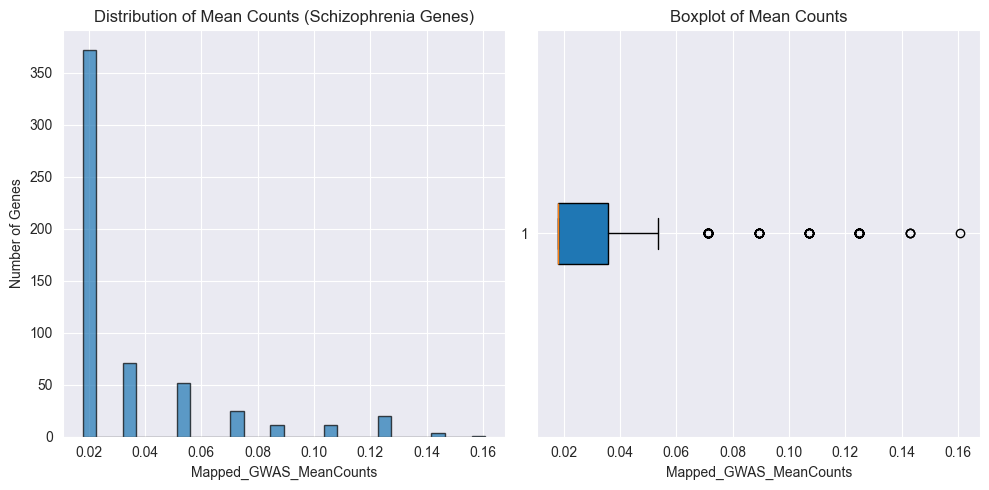

In [38]:
# Distribution of counts of schizophrenia-associated genes across cell types
counts = filtered_data_by_gene_list['Mapped_GWAS_MeanCounts'].dropna()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(counts, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Mapped_GWAS_MeanCounts')
plt.ylabel('Number of Genes')
plt.title('Distribution of Mean Counts (Schizophrenia Genes)')

plt.subplot(1,2,2)
plt.boxplot(counts, vert=False, patch_artist=True)
plt.xlabel('Mapped_GWAS_MeanCounts')
plt.title('Boxplot of Mean Counts')

plt.tight_layout()
plt.savefig("schizophrenia_counts_distribution.png")
plt.show()


In [40]:
from scipy.stats import mannwhitneyu

feature_col = "Mapped_GWAS_MeanCounts"

results_list = []
mannwhitney_pvals = []
mannwhitney_tests = []

for celltype in disease_celltypes:
    ase_col = celltype + "_gene_ase_type"
    assoc_mask = filtered_data_by_gene_list[feature_col].notnull()
    not_assoc_mask = ~assoc_mask

    # Only non-ClinVar, nonzero for binning
    binning_mask = assoc_mask & (~filtered_data_by_gene_list['is_clinvar'])
    assoc_vals = filtered_data_by_gene_list.loc[binning_mask, feature_col]

    # ---- Median-based binning ----
    if assoc_vals.empty:
        continue  # No data

    median_val = assoc_vals.median()
    bin_codes = (assoc_vals > median_val).astype(int)  # 0 if ≤ median, 1 if > median

    # Assign bins to ALL data (NaN if not in assoc_vals)
    bin_assignments = pd.Series(np.nan, index=filtered_data_by_gene_list.index)
    bin_assignments.loc[assoc_vals.index] = bin_codes

    # Optionally: assign ClinVar genes to bin 1
    clinvar_mask = assoc_mask & filtered_data_by_gene_list['is_clinvar']
    bin_assignments.loc[clinvar_mask] = 1

    # ---- Fisher's OR per bin (optional, as before) ----
    current_trait_celltype_data = {'trait': disease, 'cell_type': celltype}
    for i in [0, 1]:
        current_trait_celltype_data[f"logoddratio_{i}"] = None
        current_trait_celltype_data[f"raw_p_value_bin_{i}"] = None
        current_trait_celltype_data[f"ci_low_bin_{i}"] = None
        current_trait_celltype_data[f"ci_high_bin_{i}"] = None
        current_trait_celltype_data[f"fdr_p_value_bin_{i}"] = None
        current_trait_celltype_data[f"significance_bin_{i}"] = None

    for i in [0, 1]:
        in_bin_mask = (bin_assignments == i)
        a = (in_bin_mask & (filtered_data_by_gene_list[ase_col] == "ASE")).sum()
        b = (in_bin_mask & (filtered_data_by_gene_list[ase_col] == "nonASE")).sum()
        c = (not_assoc_mask & (filtered_data_by_gene_list[ase_col] == "ASE")).sum()
        d = (not_assoc_mask & (filtered_data_by_gene_list[ase_col] == "nonASE")).sum()
        table = np.array([[a, b], [c, d]])
        try:
            tbl = Table2x2(table)
            logOR = tbl.log_oddsratio
            ci_low, ci_high = tbl.log_oddsratio_confint()
            p = tbl.log_oddsratio_pvalue()
        except Exception:
            logOR, ci_low, ci_high, p = np.nan, None, None, 1.0
        current_trait_celltype_data[f"logoddratio_{i}"] = logOR
        current_trait_celltype_data[f"raw_p_value_bin_{i}"] = p
        current_trait_celltype_data[f"ci_low_bin_{i}"] = ci_low
        current_trait_celltype_data[f"ci_high_bin_{i}"] = ci_high

    # ---- Mann-Whitney test: Bin 0 vs Bin 1, ASE vs nonASE ----
    for ase_type in ["ASE", "nonASE"]:
        bin0 = filtered_data_by_gene_list.loc[
            (bin_assignments == 0) & (filtered_data_by_gene_list[ase_col] == ase_type), feature_col
        ].dropna()
        bin1 = filtered_data_by_gene_list.loc[
            (bin_assignments == 1) & (filtered_data_by_gene_list[ase_col] == ase_type), feature_col
        ].dropna()
        if len(bin0) > 0 and len(bin1) > 0:
            stat, pval = mannwhitneyu(bin0, bin1, alternative='two-sided')
        else:
            pval = np.nan  # not enough data
        mannwhitney_pvals.append(pval)
        mannwhitney_tests.append({
            'trait': disease,
            'cell_type': celltype,
            'ase_type': ase_type,
            'mannwhitney_p': pval,
        })

    results_list.append(current_trait_celltype_data)

# --- FDR correction for all tests ---
mannwhitney_pvals_array = np.array(mannwhitney_pvals)
valid_mask = ~np.isnan(mannwhitney_pvals_array)
fdr_significant = np.zeros_like(mannwhitney_pvals_array, dtype=bool)
adj_pvals = np.full_like(mannwhitney_pvals_array, np.nan, dtype=float)

if valid_mask.sum() > 0:
    sig, adj = fdrcorrection(mannwhitney_pvals_array[valid_mask], alpha=0.05)
    fdr_significant[valid_mask] = sig
    adj_pvals[valid_mask] = adj

for i, test in enumerate(mannwhitney_tests):
    test['mannwhitney_fdr_p'] = adj_pvals[i]
    test['mannwhitney_fdr_significant'] = fdr_significant[i]

mannwhitney_df = pd.DataFrame(mannwhitney_tests)
print(mannwhitney_df)


           trait                cell_type ase_type  mannwhitney_p  \
0  Schizophrenia   Cortical_organoids_d50      ASE   4.875062e-20   
1  Schizophrenia   Cortical_organoids_d50   nonASE   3.100242e-66   
2  Schizophrenia  Cortical_organoids_d100      ASE   1.316546e-14   
3  Schizophrenia  Cortical_organoids_d100   nonASE   1.387700e-71   
4  Schizophrenia  Cortical_organoids_d150      ASE   9.334957e-19   
5  Schizophrenia  Cortical_organoids_d150   nonASE   1.292413e-66   

   mannwhitney_fdr_p  mannwhitney_fdr_significant  
0       7.312592e-20                         True  
1       6.200483e-66                         True  
2       1.316546e-14                         True  
3       8.326198e-71                         True  
4       1.120195e-18                         True  
5       3.877239e-66                         True  


In [41]:
import seaborn as sns



sns.set(style="whitegrid", font_scale=1.3)

for _, row in mannwhitney_df.iterrows():
    trait, cell, ase_type = row['trait'], row['cell_type'], row['ase_type']
    if trait.lower() != 'schizophrenia' or cell not in valid_ct:
        continue

    subset = filtered_data_by_gene_list[
        filtered_data_by_gene_list[cell + "_gene_ase_type"] == ase_type
    ].copy()
    binning_mask = subset[feature_col].notnull() & (~subset['is_clinvar'])
    assoc_vals = subset.loc[binning_mask, feature_col]
    if assoc_vals.empty:
        continue

    median_val = assoc_vals.median()
    bin_codes = (assoc_vals > median_val).astype(int)
    bin_assignments = pd.Series(np.nan, index=subset.index)
    bin_assignments.loc[assoc_vals.index] = bin_codes
    clinvar_mask = subset[feature_col].notnull() & subset['is_clinvar']
    bin_assignments.loc[clinvar_mask] = 1
    subset['bin'] = bin_assignments

    plotdata = subset.dropna(subset=['bin', feature_col]).copy()
    plotdata['bin'] = plotdata['bin'].astype(int)
    if not all([(plotdata['bin'] == b).any() for b in [0, 1]]):
        print(f"Skipping plot for {trait}, {cell}, {ase_type}: at least one bin is empty.")
        continue

    # Convert bin to readable labels for plot
    plotdata['Bin label'] = plotdata['bin'].map({0: "≤ median", 1: "> median"})

    for b in [0, 1]:
        count = (plotdata['bin'] == b).sum()
        print(f"{trait} | {cell} | {ase_type} | Bin {b}: {count} samples")



    fig, ax = plt.subplots(figsize=(7, 5))

    # Prettier boxplot and stripplot
    sns.boxplot(
        data=plotdata, x='Bin label', y=feature_col, ax=ax,
        showfliers=False, width=0.45, boxprops={'alpha': 0.7}
    )
    sns.stripplot(
        data=plotdata, x='Bin label', y=feature_col, ax=ax,
        color='royalblue', size=7, jitter=True, linewidth=0.6, edgecolor='gray', alpha=0.7
    )

    ax.set_xlabel('Bin (by GWAS mean counts)')
    ax.set_ylabel(feature_col)
    ax.set_title(f"{trait} — {cell} — {ase_type} genes", fontsize=15, fontweight="bold", pad=18)

    # --- Annotate with p-value and significance star ---
    pval = row['mannwhitney_fdr_p']
    sig = row['mannwhitney_fdr_significant']
    star = "★" if sig and not pd.isna(pval) else ""
    # Find a nice spot for annotation
    y_max = plotdata[feature_col].max()
    x_pos = 0.5  # center between bins
    ax.text(
        x_pos, y_max * 1.08,
        f"FDR p-value: {pval:.2e}\n{star}",
        ha='center', va='bottom', fontsize=14, color='red' if sig else 'black',
        fontweight="bold"
    )

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine(ax=ax)
    plt.tight_layout()

    fname = f"{trait.replace(' ', '_')}__{cell}__{ase_type}_mannwhitney.png"
    fig.savefig(os.path.join(target_dir, fname), dpi=180)
    plt.close(fig)

print(f"Plots saved to {target_dir}")


Schizophrenia | Cortical_organoids_d50 | ASE | Bin 0: 64 samples
Schizophrenia | Cortical_organoids_d50 | ASE | Bin 1: 29 samples
Schizophrenia | Cortical_organoids_d50 | nonASE | Bin 0: 200 samples
Schizophrenia | Cortical_organoids_d50 | nonASE | Bin 1: 116 samples
Schizophrenia | Cortical_organoids_d100 | ASE | Bin 0: 48 samples
Schizophrenia | Cortical_organoids_d100 | ASE | Bin 1: 19 samples
Schizophrenia | Cortical_organoids_d100 | nonASE | Bin 0: 217 samples
Schizophrenia | Cortical_organoids_d100 | nonASE | Bin 1: 125 samples
Schizophrenia | Cortical_organoids_d150 | ASE | Bin 0: 59 samples
Schizophrenia | Cortical_organoids_d150 | ASE | Bin 1: 28 samples
Schizophrenia | Cortical_organoids_d150 | nonASE | Bin 0: 206 samples
Schizophrenia | Cortical_organoids_d150 | nonASE | Bin 1: 109 samples
Plots saved to schizophrenia_correlations


In [42]:
import matplotlib.pyplot as plt
import numpy as np

target_dir = "schizophrenia_correlations"
os.makedirs(target_dir, exist_ok=True)
valid_ct = {'Cortical_organoids_d50', 'Cortical_organoids_d100', 'Cortical_organoids_d150'}

for _, row in mannwhitney_df.iterrows():
    trait, cell, ase_type = row['trait'], row['cell_type'], row['ase_type']
    if trait.lower() != 'schizophrenia' or cell not in valid_ct:
        continue

    # Get logOR, CI, and significance for bin 0 and bin 1
    try:
        logOR0 = next(d['logoddratio_0'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell)
        logOR1 = next(d['logoddratio_1'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell)
        ci0 = (next(d['ci_low_bin_0'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell),
               next(d['ci_high_bin_0'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell))
        ci1 = (next(d['ci_low_bin_1'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell),
               next(d['ci_high_bin_1'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell))
        sig0 = next(d['significance_bin_0'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell)
        sig1 = next(d['significance_bin_1'] for d in results_list if d['trait'] == trait and d['cell_type'] == cell)
    except StopIteration:
        continue

    xs = np.array([0, 1])
    ys = np.array([logOR0, logOR1])
    err_low = np.array([abs(logOR0 - ci0[0]), abs(logOR1 - ci1[0])])
    err_high = np.array([abs(ci0[1] - logOR0), abs(ci1[1] - logOR1)])
    sigs = [sig0, sig1]

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.errorbar(xs, ys, yerr=[err_low, err_high], fmt='o', color='black',
                ecolor='gray', elinewidth=2, capsize=6, markersize=10,
                markerfacecolor='red', markeredgecolor='k', alpha=0.8)

    # Color the points by significance
    for x, y, s in zip(xs, ys, sigs):
        ax.scatter(x, y, color='red' if s else 'blue', s=120, zorder=3, edgecolor='k')

    ax.axhline(y=0, color='black', linestyle='--', linewidth=1.3, alpha=0.7)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Bin 0 (≤ median)', 'Bin 1 (> median)'])
    ax.set_xlabel('Bin (by GWAS mean counts)')
    ax.set_ylabel('Log Odds Ratio (ASE vs nonASE)')
    ax.set_title(f"{trait} — {cell} — {ase_type} genes\nLog Odds Ratio by Bin", fontsize=13)

    # Annotate p-value and significance
    pval = row['mannwhitney_fdr_p']
    sig = row['mannwhitney_fdr_significant']
    star = "★" if sig and not pd.isna(pval) else ""
    y_max = np.nanmax(ys + err_high)
    ax.text(
        0.5, y_max * 1.1 if y_max > 0 else y_max - 1,
        f"FDR p-value: {pval:.2e} {star}",
        ha='center', va='bottom', fontsize=14, color='red' if sig else 'black', fontweight="bold"
    )

    # Annotate n for each bin (optional)
    # counts = ...
    # ax.text(...)

    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    fname = f"{trait.replace(' ', '_')}__{cell}__{ase_type}_logORbins.png"
    fig.savefig(os.path.join(target_dir, fname))
    plt.close(fig)

print(f"LogOR plots saved to {target_dir}")


LogOR plots saved to schizophrenia_correlations
